# Описание проекта

Заказчик: развлекательное приложение Procrastinate Pro+. 

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

**Цели проекта:** 
- Изучить: 
 - откуда приходят пользователи и какими устройствами они пользуются
 - сколько стоит привлечение пользователей из различных рекламных каналов
 - сколько денег приносит каждый клиент
 - когда расходы на привлечение клиента окупаются
 - какие факторы мешают привлечению клиентов
- Выделить причины неэффективности привлечения пользователей
- Дать рекомендации отделу маркетинга
 

### Описание данных

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.
Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

**Структура** `visits_info_short.csv`:

- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

**Структура** `orders_info_short.csv`:

- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

**Структура** `costs_info_short.csv`:

- `dt` — дата проведения рекламной кампании,
- `Channel` — идентификатор рекламного источника,
- `costs` — расходы на эту кампанию.

### Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

pd.options.display.float_format = '{:,.2f}'.format

Загружу данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

In [2]:
# датасет с информацией о посещениях сайта 
visits = pd.read_csv('visits_info_short.csv')
# датасет с информацией о заказах
orders = pd.read_csv('orders_info_short.csv')
# датасет с информацией о расходах на рекламу
costs = pd.read_csv('costs_info_short.csv')    

In [3]:
# функция для переименования столбцов в датасетах
def rename_col(name_df):
    name_df.columns = (col.replace(' ', '_') for col in name_df.columns.str.lower())
    print(name_df.columns)

#### Предобработка датасета с информацией о посещениях сайта `visits`

Переименую столбцы в датасете

In [4]:
rename_col(visits)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')


In [5]:
display(visits.head(5))
visits.info()

user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null object
session_end      309901 non-null object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
# проверка на явные дубликаты
visits.duplicated().sum()

0

Пропуски в датасете `visits` отсутствуют. Явных дубликатов тоже не нашлось. Необходимо столбцы `session_start` и `session_end` преобразовать к типу данных datetime.

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

#### Предобработка датасета с информацией о заказах `orders`

Переименую столбцы в датасете

In [8]:
rename_col(orders)

Index(['user_id', 'event_dt', 'revenue'], dtype='object')


In [9]:
display(orders.head(5))
orders.info()

user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null object
revenue     40212 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
# проверка на явные дубликаты
orders.duplicated().sum()

0

Пропуски и явные дубликаты отсутствуют. Необходимо столбец `event_dt`  преобразовать к типу данных datetime.

In [11]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

#### Предобработка датасета с информацией о расходах на рекламу `costs`

Переименую столбцы в датасете

In [12]:
rename_col(costs)

Index(['dt', 'channel', 'costs'], dtype='object')


In [13]:
display(costs.head(5))
costs.info()

dt   channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
2  2019-05-03  FaceBoom  85.80
3  2019-05-04  FaceBoom 136.40
4  2019-05-05  FaceBoom 122.10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null object
channel    1800 non-null object
costs      1800 non-null float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
# проверка на явные дубликаты
costs.duplicated().sum()

0

Пропуски и явные дубликаты отсутствуют. Необходимо столбец `dt`  преобразовать к типу данных datetime.

In [15]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

**Вывод**

Изучила данные. Проверила датасеты на наличие пропусков и явных дубликатов, переименовала столбцы в нижний регистр без пропусков. Привела даты к нужному типу данных.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

#### Функция для создания профилей пользователей

In [16]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

# параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

# для когортного анализа определяем дату первого посещения
# и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

# добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

# считаем количество уникальных пользователей
# с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

# объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

# делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

# добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

# стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для подсчета Retention Rate

In [17]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчета конверсии

In [18]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для подсчета LTV

In [19]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для сглаживания данных

In [20]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

#### Функция для построения графика Retention Rate

In [21]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 12))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция для построения графика конверсии

In [22]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 6))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI

In [23]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize=14)
    plt.title('LTV', fontsize=14)

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения', fontsize=14)
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=14)

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 5, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения', fontsize=14)
    plt.title('Динамика стоимости привлечения пользователей', fontsize=14)

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize=14)
    plt.title('ROI', fontsize=14)

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 3, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения', fontsize=14)
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=14)

    plt.tight_layout()
    plt.show()

**Вывод**

Добавила функции для вычисления значений метрик и для построения графиков.

### Исследовательский анализ данных

In [24]:
# функция возвращает таблицу с долей платящих и общим числом пользователей
def share_pay(dims):
    payer = profiles.pivot_table(index=dims, values='payer', aggfunc={'count', 'sum', 'mean'}) \
                    .sort_values(by='mean', ascending=False) \
                    .rename(
                              columns={'count': 'Количество пользователей', 
                                        'sum': 'Количество платящих пользователи',
                                       'mean': 'Доля платящих пользователей, %'}
                           )
    payer['Доля платящих пользователей, %'] = (payer['Доля платящих пользователей, %'] * 100)
    return payer

#### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [25]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True              1.09  
1  2019-07-09 2019-07-01  False              1.11  
2  2019-10-01 2019-10-01  False              0.00  
3  2019-08-22 2019-08-01  False              0.99  
4  2019-10-02 2019-10-01  False              0.23

In [26]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

print(f"Минимальная дата привлечения пользователей {min_date}")
print(f"Максимальная дата привлечения пользователей {max_date}")

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


Составила профили пользователей, минимальная дата привлечения: 2019-05-01, максимальная: 2019-10-27.

#### Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей? 

In [27]:
share_pay('region')

Количество пользователей  Доля платящих пользователей, %  \
region                                                                    
United States                    100002                            6.90   
Germany                           14981                            4.11   
UK                                17575                            3.98   
France                            17450                            3.80   

               Количество платящих пользователи  
region                                           
United States                          6,902.00  
Germany                                  616.00  
UK                                       700.00  
France                                   663.00

Пользователи приходят из США, Германии, Великобритании и Франции. Самое большое количество пользователей из США, у них же самая большая доля платящих пользователей. Самая маленькая доля платящих пользователей у Франции. Меньше всего пользователей из Германии, но по доле платящих пользователей они на 2 месте.

#### Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи? 

In [28]:
share_pay('device')

Количество пользователей  Доля платящих пользователей, %  \
device                                                              
Mac                         30042                            6.36   
iPhone                      54479                            6.21   
Android                     35032                            5.85   
PC                          30455                            5.05   

         Количество платящих пользователи  
device                                     
Mac                              1,912.00  
iPhone                           3,382.00  
Android                          2,050.00  
PC                               1,537.00

Клиенты используют такие устройства как Mac, PC, iPhone и Android. Самая большая доля платящих у пользователей Mac, там же самое маленькое количество пользователей. Больше всего пользователей iPhone, доля платящих пользователей на 2 месте. Самая маленькая доля платящих у пользователей PC.

#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. 

In [29]:
share_pay('channel')

Количество пользователей  Доля платящих пользователей, %  \
channel                                                                        
FaceBoom                               29144                           12.20   
AdNonSense                              3880                           11.34   
lambdaMediaAds                          2149                           10.47   
TipTop                                 19561                            9.60   
RocketSuperAds                          4448                            7.91   
WahooNetBanner                          8553                            5.30   
YRabbit                                 4312                            3.83   
MediaTornado                            4364                            3.57   
LeapBob                                 8553                            3.06   
OppleCreativeMedia                      8605                            2.71   
organic                                56439                            2.06   

                    Количество платящих пользователи  
channel                                               
FaceBoom                                    3,557.00  
AdNonSense                                    440.00  
lambdaMediaAds                                225.00  
TipTop                                      1,878.00  
RocketSuperAds                                352.00  
WahooNetBanner                                453.00  
YRabbit                                       165.00  
MediaTornado                                  156.00  
LeapBob                                       262.00  
OppleCreativeMedia                            233.00  
organic                                     1,160.00

Самое большое количество платящих пользователей у пользователей перешедших по рекламе из FaceBoom, доля платящих здесь наибольшая, по количеству пользователей этот рекламный канал на 2 месте. Больше всего пользователей приложения Procrastinate Pro+ из органического траффика, но у этого рекламного канала самая маленькая доля платящих пользователей. 

**Вывод**

- Составила профили пользователей, минимальная дата привлечения: 2019-05-01, максимальная: 2019-10-27
- Пользователи приходят из США, Германии, Великобритании и Франции. Больше всего платящих пользователей приходит на США
- Пользователи используют Mac, iPhone, Android и PC. Платящие пользователи предпочитают Mac. Большая часть пользователей использует мобильные устройства. Пользователи Apple имеют лучшую конверсию в пользователи
- Больше всего пользователей пришло из FaceBoom, TipTop и из органического траффика

### Маркетинг

#### Общая сумму расходов на маркетинг.

In [30]:
print(f"Общая сумма расходов на маркетинг составляет {costs['costs'].sum().astype(int)} у.е.")

Общая сумма расходов на маркетинг составляет 105497 у.е.


#### Как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник?

In [31]:
costs.pivot_table(index='channel', values='costs', aggfunc='sum') \
     .sort_values(by='costs', ascending=False) \
     .rename(columns={'costs': 'Затраты'}) \
     .astype(int)

Затраты
channel                    
TipTop                54751
FaceBoom              32445
WahooNetBanner         5151
AdNonSense             3911
OppleCreativeMedia     2151
RocketSuperAds         1832
LeapBob                1797
lambdaMediaAds         1557
MediaTornado            954
YRabbit                 944

Траты распределены крайне неравномерно. Больше всего денег постратили на рекламаму в TipTop и FaceBoom. Меньше всего на MediaTornado и YRabbit. 

#### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

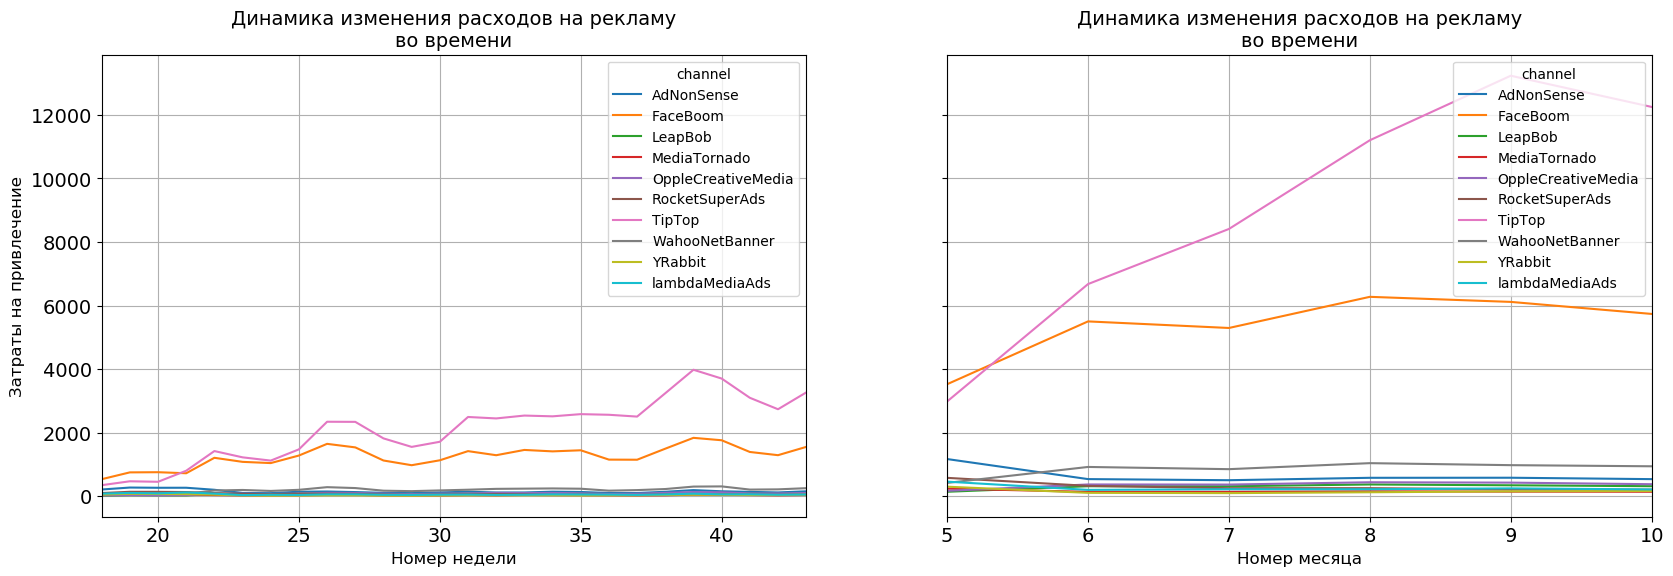

In [33]:
costs['month'] = pd.to_datetime(costs['dt']).dt.month
costs['week'] = pd.to_datetime(costs['dt']).dt.week

plt.figure(figsize=(20, 6))

# по неделям
ax1 = plt.subplot(1, 2, 1)

costs.pivot_table(
                      index='week', 
                      columns='channel', 
                      values='costs',
                      aggfunc='sum'
                ) \
     .plot(grid=True, ax=ax1)

plt.xlabel('Номер недели', fontsize=12)
plt.ylabel('Затраты на привлечение', fontsize=12)
plt.title('Динамика изменения расходов на рекламу\nво времени', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# по месяцам
ax2 = plt.subplot(1, 2, 2, sharey=ax1)

costs.pivot_table(index='month',
                  columns='channel',
                  values='costs',
                  aggfunc='sum').\
                  plot(grid=True, ax=ax2)

plt.xlabel('Номер месяца', fontsize=12)
plt.ylabel('Затраты на привлечение', fontsize=12)
plt.title('Динамика изменения расходов на рекламу\nво времени', fontsize= 14)
plt.xticks(fontsize=14);

Для всех рекламных каналов, кроме TipTop и Faceboom, в течение каждой недели и месяца рекламный бюджет практически не изменялся, за месяц рекламный бюджет для таких каналов составлял не более 1 500 у.е., за неделю не более 500 у.е. Для канала FaceBoom в каждую из недель постепенно увеличивался рекламный бюджет, в неделю на этот канал тратилось от 500 до 1 800 у.е, а за месяц от 3 800 до 6 200 у.е. Канал TipTop является лидером по количеству полученных средств за рекламу, за 18 неделю в канал вкладывали порядка 450 у.е., пик пришелся на 38 неделю, за рекламу заплатили 4 000 у.е., за месяц туда вкладывали от 3 300 у.е. в начале мае и до 12 200 у.е. к октябрю, с пиком в сентябре порядка 13 500 у.е.

####  Cколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника?

In [34]:
mean_cac = (  
                  profiles
                  .query('channel != "organic"')[['user_id', 'acquisition_cost']]
                  .agg({'acquisition_cost': 'mean'})
            )

print(f'Средний САС по всему датасету равен: {mean_cac.acquisition_cost.round(2)}')

profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean') \
        .sort_values(by='acquisition_cost', ascending=False) \
        .rename(columns={'acquisition_cost': 'CAC'})

Средний САС по всему датасету равен: 1.13


CAC
channel                
TipTop             2.80
FaceBoom           1.11
AdNonSense         1.01
lambdaMediaAds     0.72
WahooNetBanner     0.60
RocketSuperAds     0.41
OppleCreativeMedia 0.25
YRabbit            0.22
MediaTornado       0.22
LeapBob            0.21
organic            0.00

Самое дорогое привлечение пользователя приходится на рекламный канал TipTop и составляет 2.8 у.е. Так же более 1 у.е. за каждого пользователя платили в каналах FaceBoom: 1.11 у.е и AdNonSense: 1.01. Меньше всего для привлечения платили каналам YRabbit, MediaTornado, LeapBob. Средний САС по всем данным равен 1.13 у.е.

**Вывод**

- Общая сумма расходов на маркетинг составляет 105 497 у.е.
- Больше всего денег постратили на рекламаму в TipTop и FaceBoom. Меньше всего на MediaTornado и YRabbit. 
- Для всех рекламных каналов, кроме TipTop и Faceboom, в течение каждой недели и месяца рекламный бюджет практически не изменялся. Канал TipTop является лидером по количеству полученных средств за рекламу и с каждым месяцем бюджет на рекламу увеличивается.
- Самое дорогое привлечение пользователя приходится на рекламный канал TipTop, самое дешевое через каналы YRabbit, MediaTornado, LeapBob.

### Оцените окупаемость рекламы

На этом шаге уберу из данных органических пользователей, так как для их привлечения не были потрачены деньги

In [35]:
profiles = profiles.query('channel != "organic"')

In [36]:
# момент анализа
observation_date = datetime(2019, 11, 1).date()
# горизонт анализа 
horizon_days = 14

#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

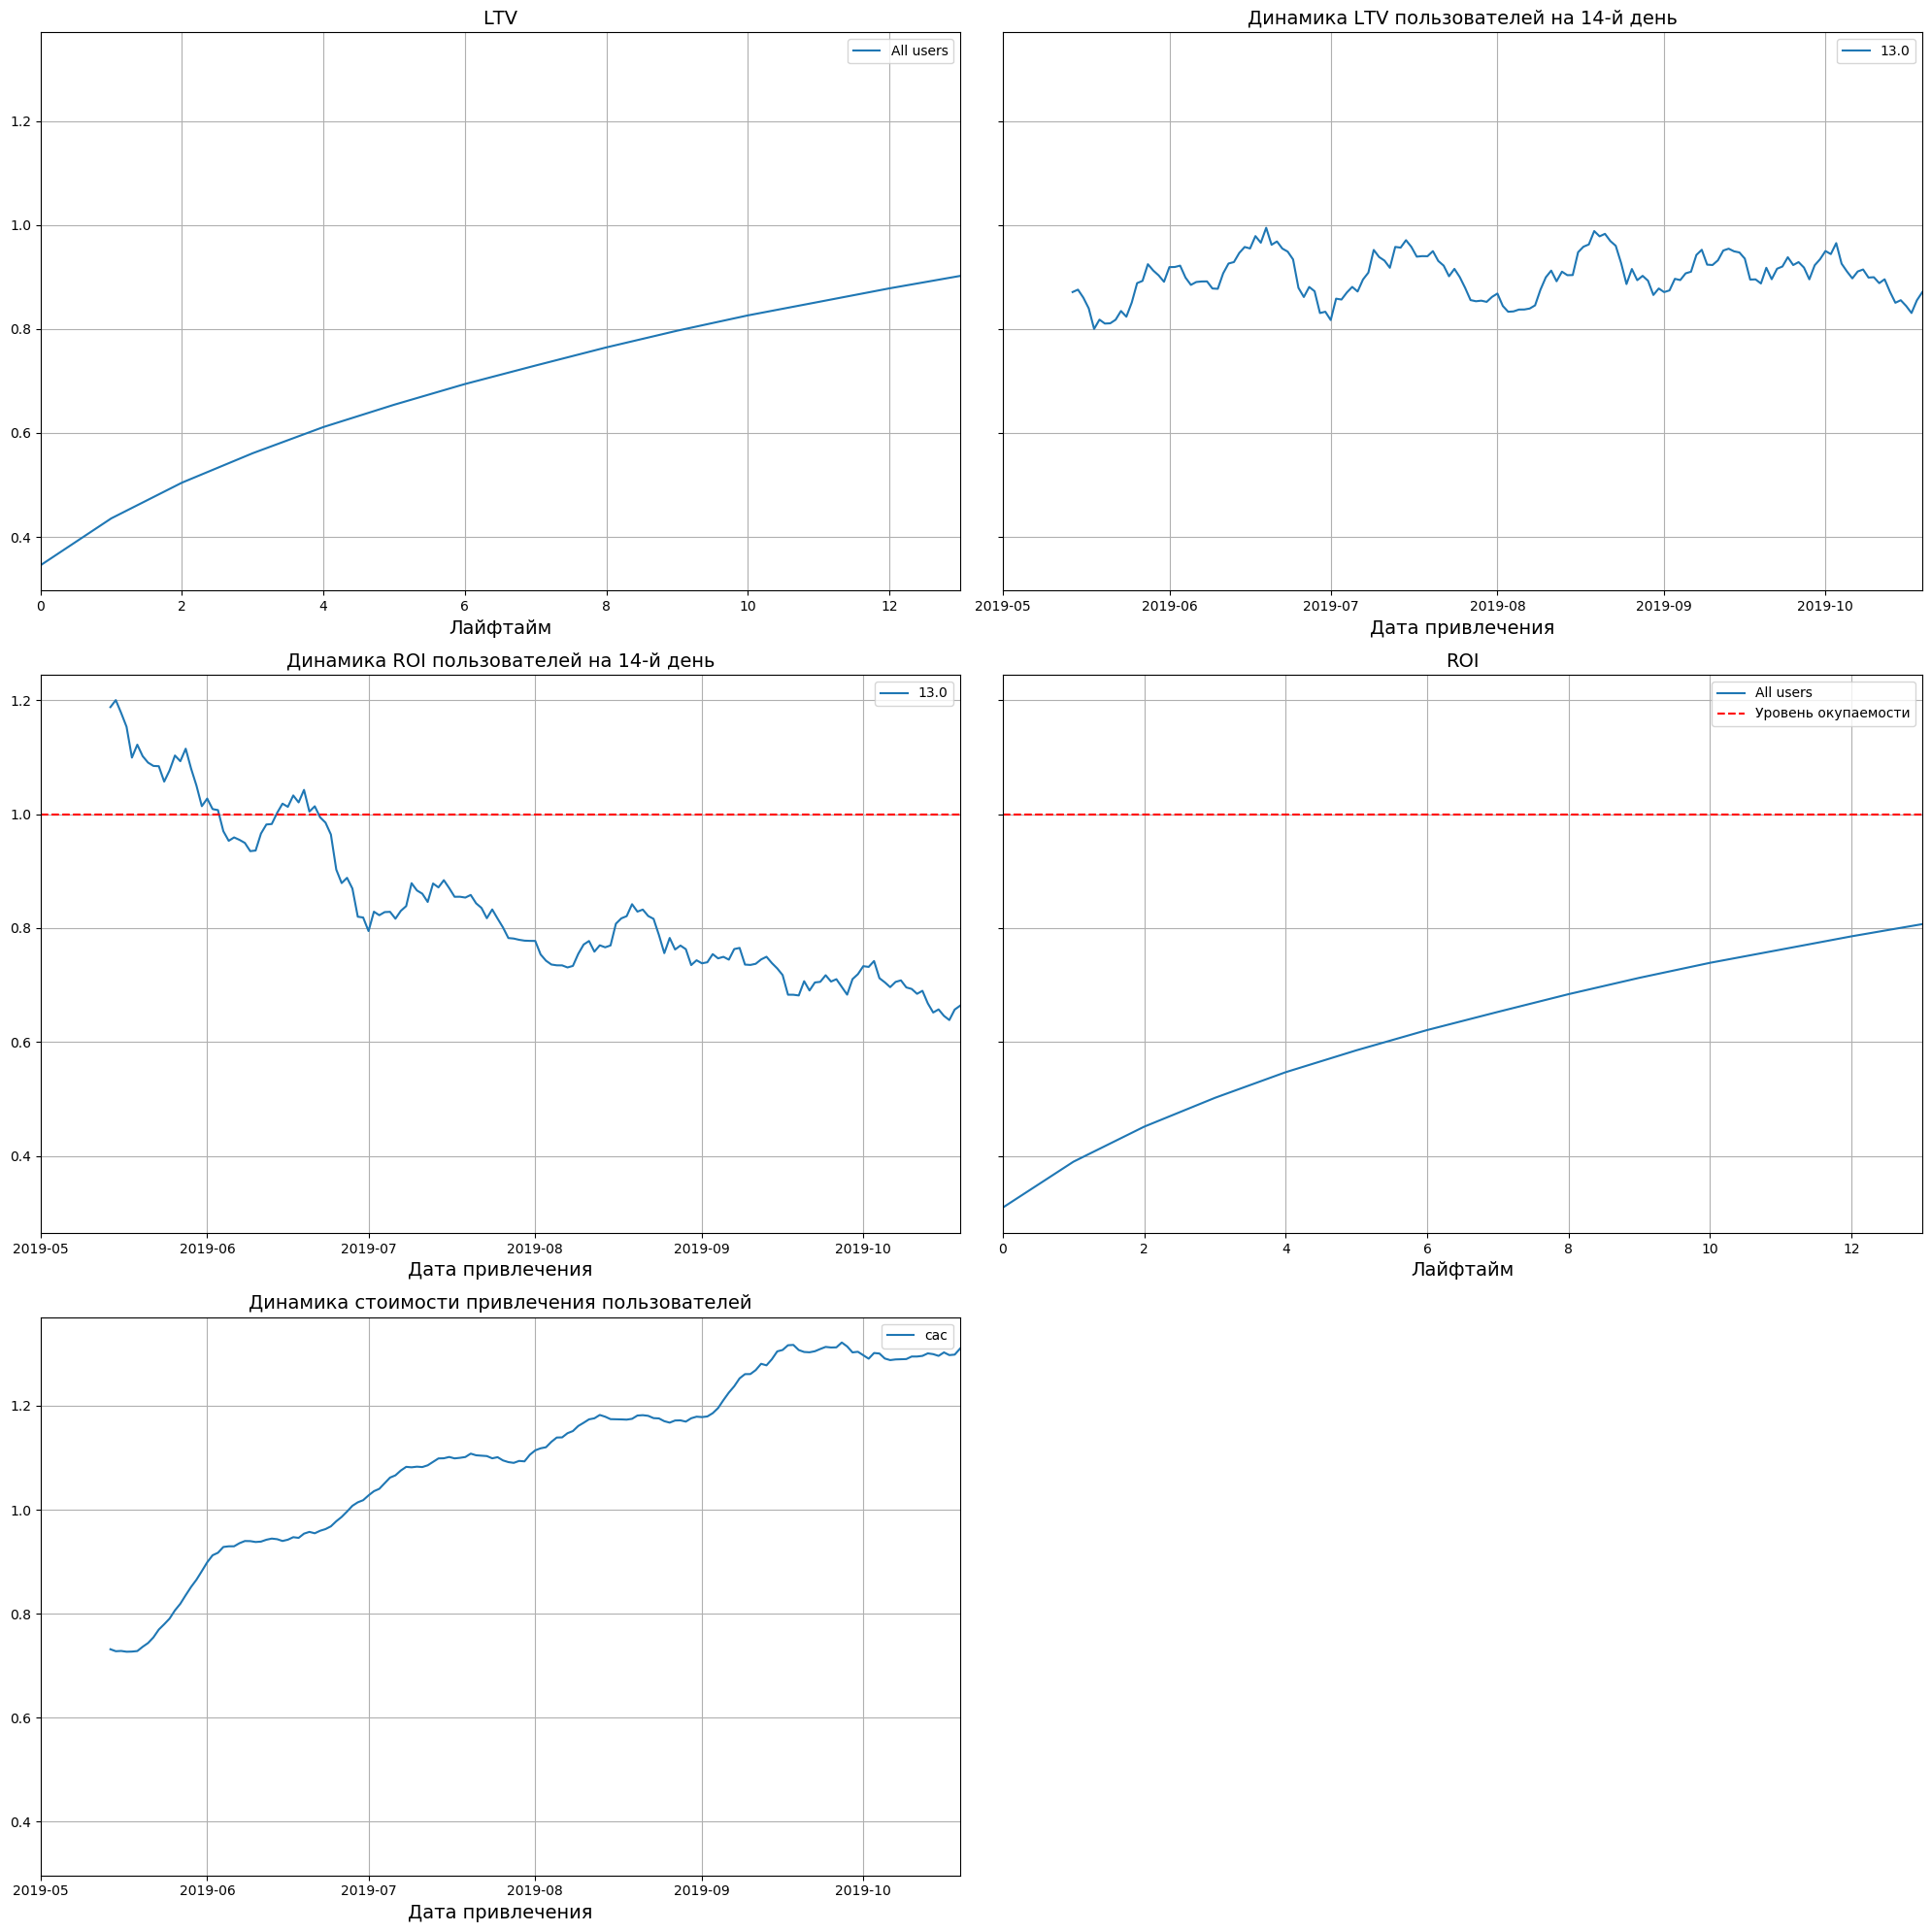

In [37]:
# расчет LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# построение графика
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать следующие выводы:
- Затраты на рекламу не превысили порог окупаемости. ROI к 14 дню — чуть выше 80%.
- ROI пользователей на 14-й день падает, начиная с июня ниже порога окупаемости
- САС растет, рекламный бюджет увеличивается
- Стоимость привлечения пользователей не превышает 1.3 у.е и постепенно увеличивается

####  Проанализируйте окупаемость рекламы с разбивкой по устройствам

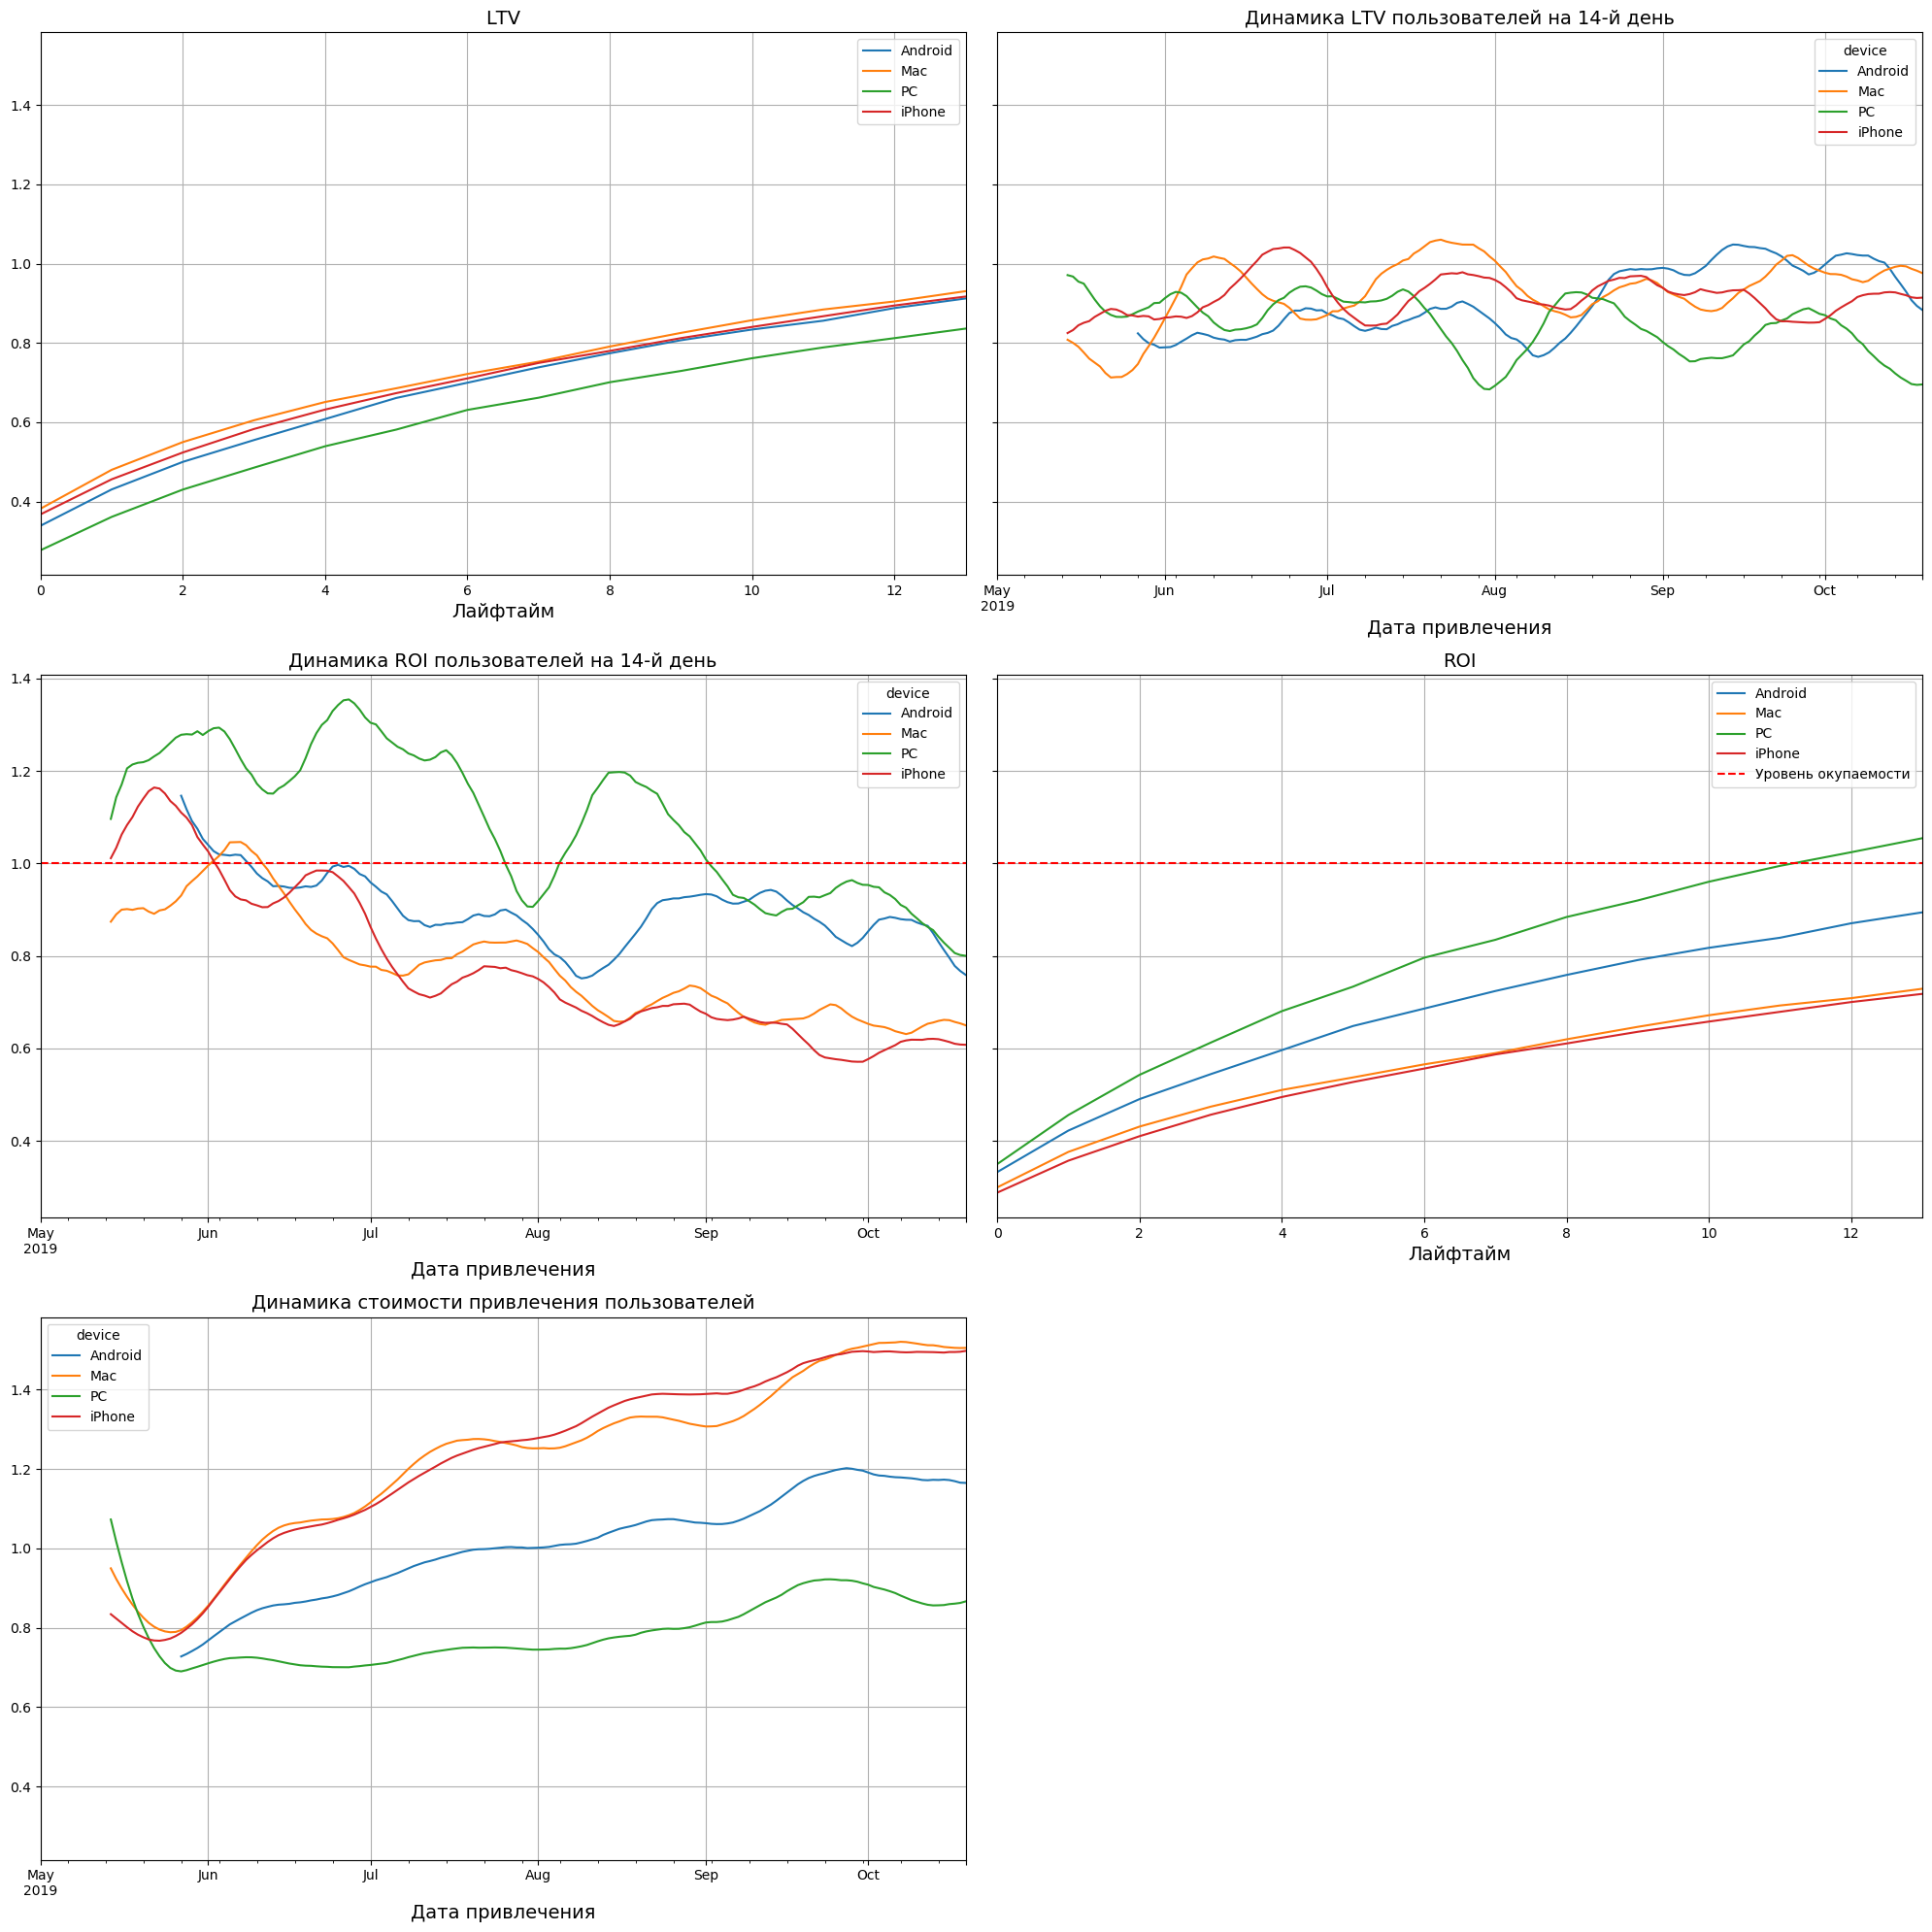

In [38]:
# окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

filter_data(ltv_history, 14)
filter_data(roi_history, 14)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

- Меньше всего денег приносят пользователи PC
- Только на PC реклама начала окупаться с 11 дня лайфтайма, при условии самой маленькой стоимости рекламы
- Стоимость привлечения пользователей во всех когортах начиналась примерно с одного значения, больше всего в цене выросла реклама для iPhone и Mac

#### Проанализируйте окупаемость рекламы с разбивкой по странам.

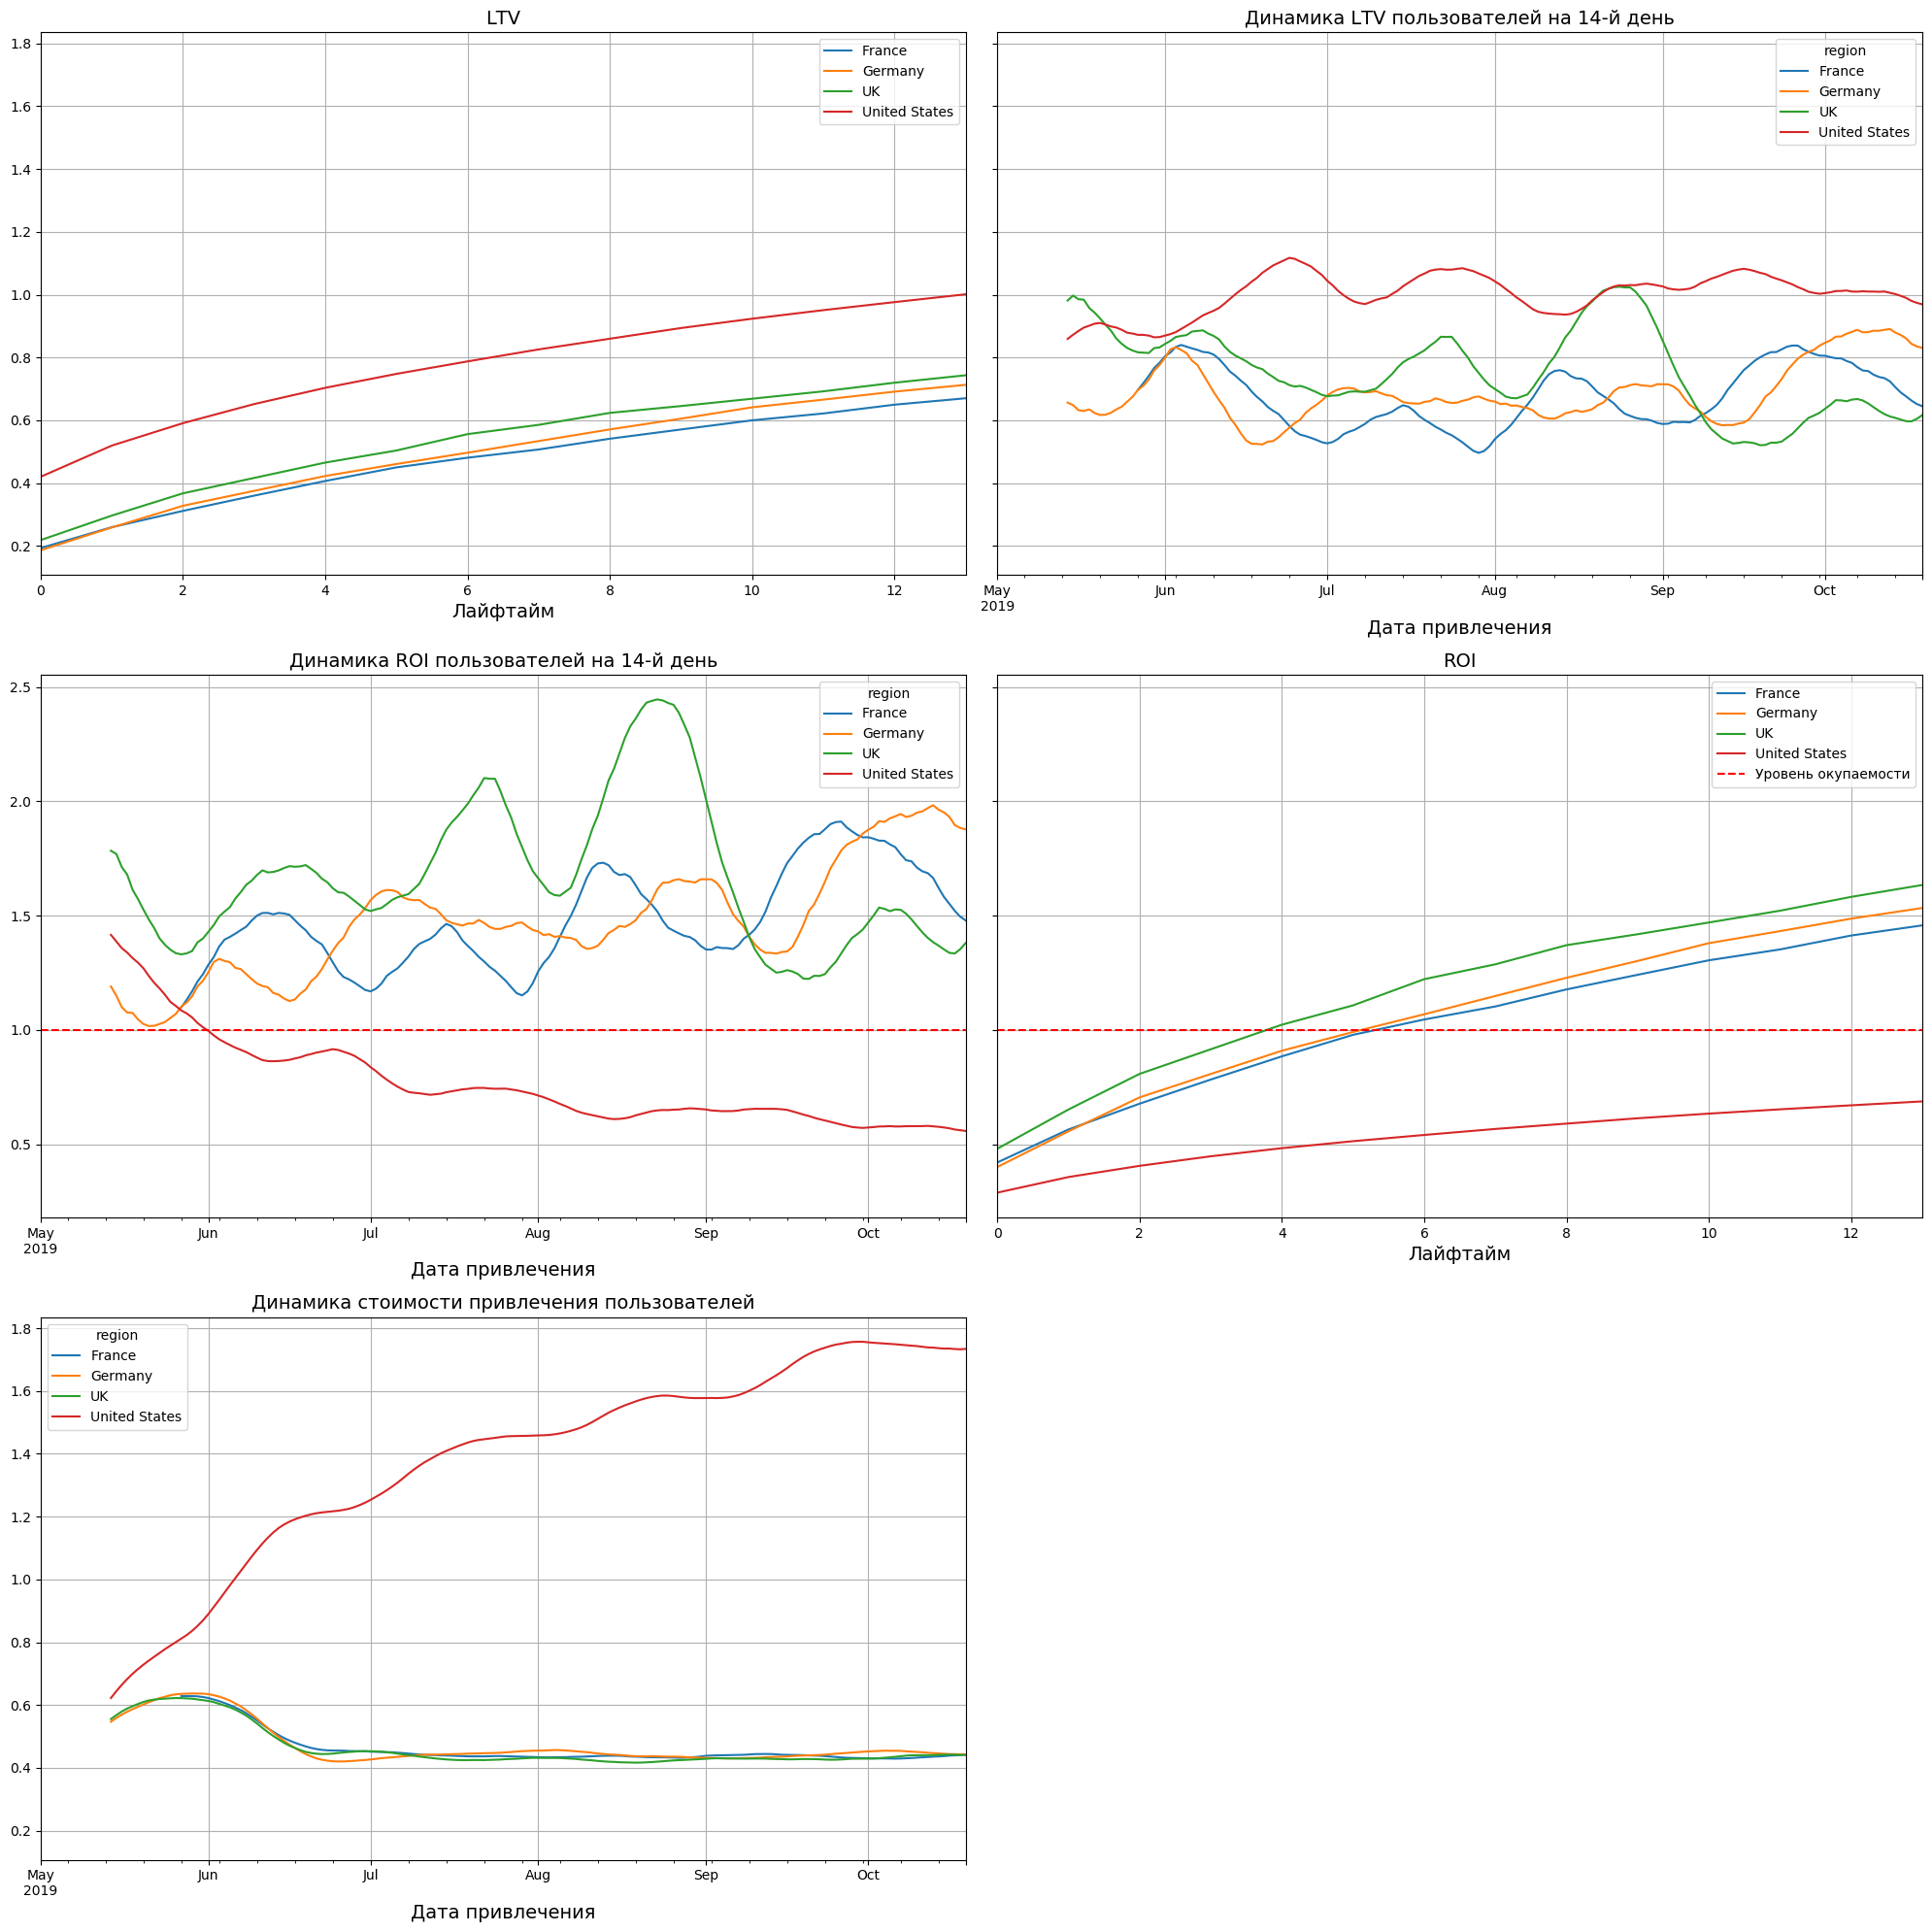

In [39]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

filter_data(ltv_history, 14)
filter_data(roi_history, 14)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

- Самый большой показатель LTV у США
- С 6 дня лайфтайма реклама начала окупаться в Великобритании, Германии и Франции
- Стоимость рекламы США самая большая и очень сильно растет, в то время как в других странах после июня затраты на рекламу начали снижаться, достигнув уровня ~0.4 у.е.

####  Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

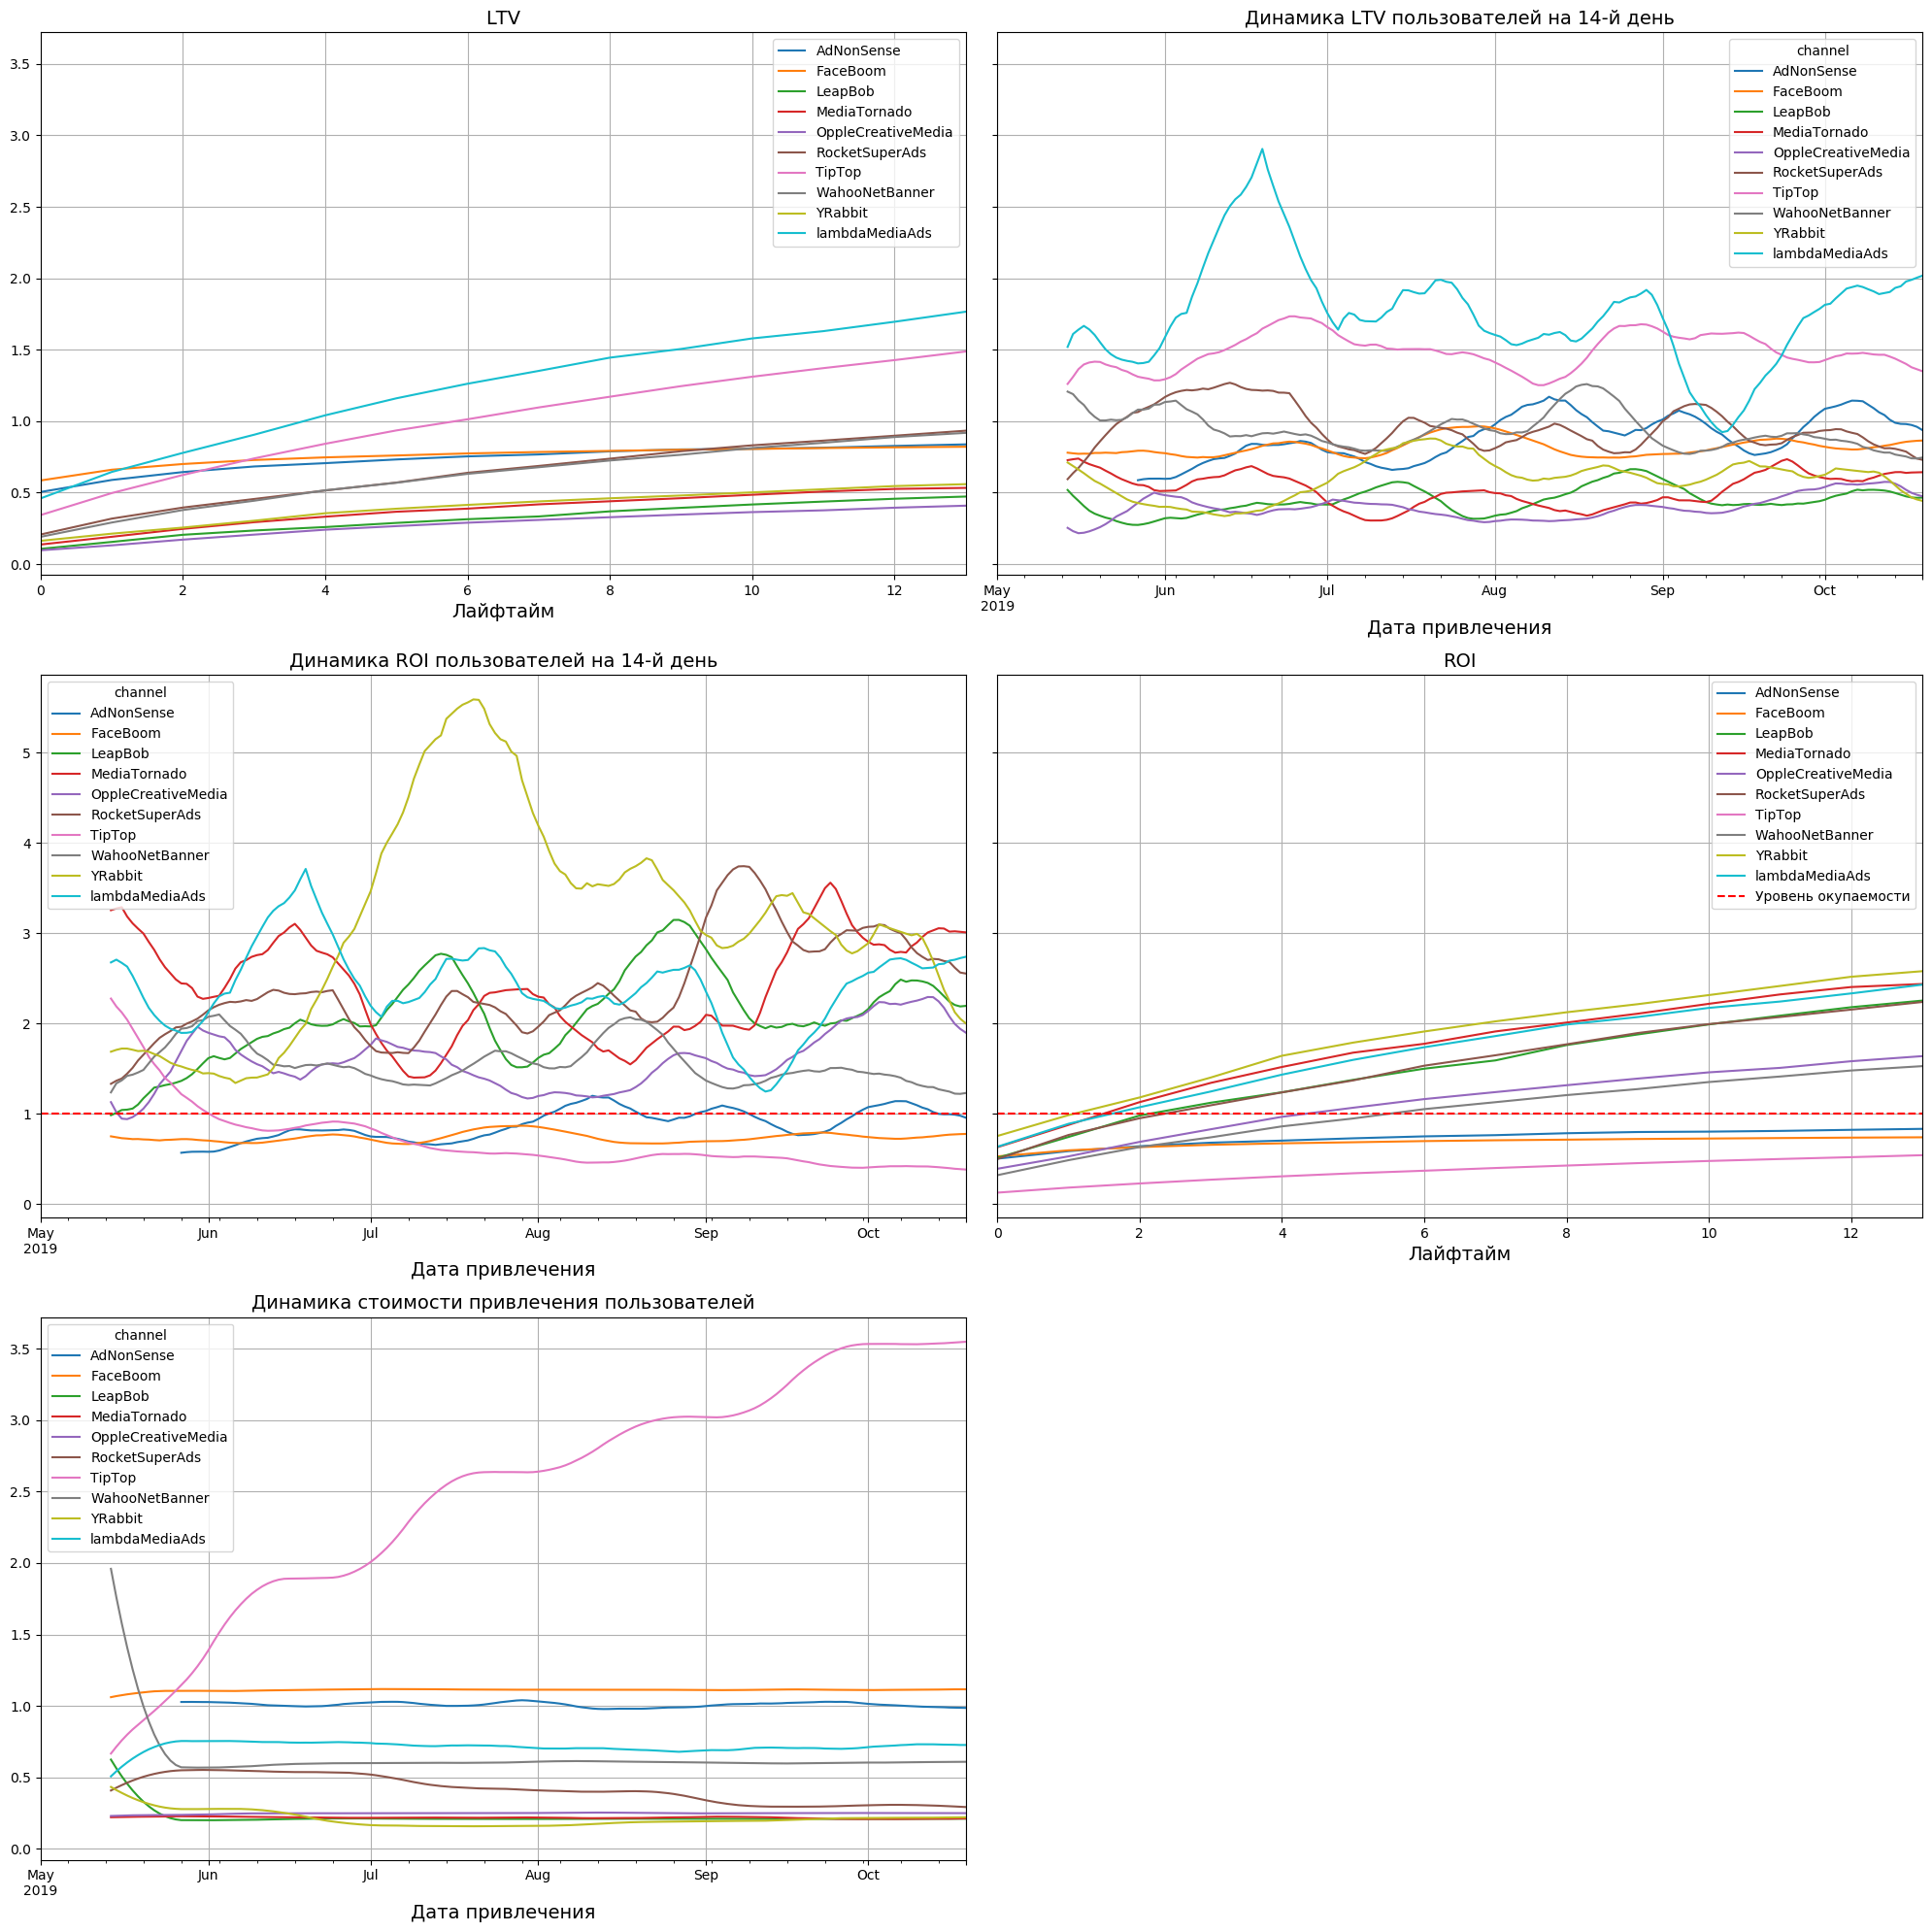

In [40]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

filter_data(ltv_history, 14)
filter_data(roi_history, 14)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

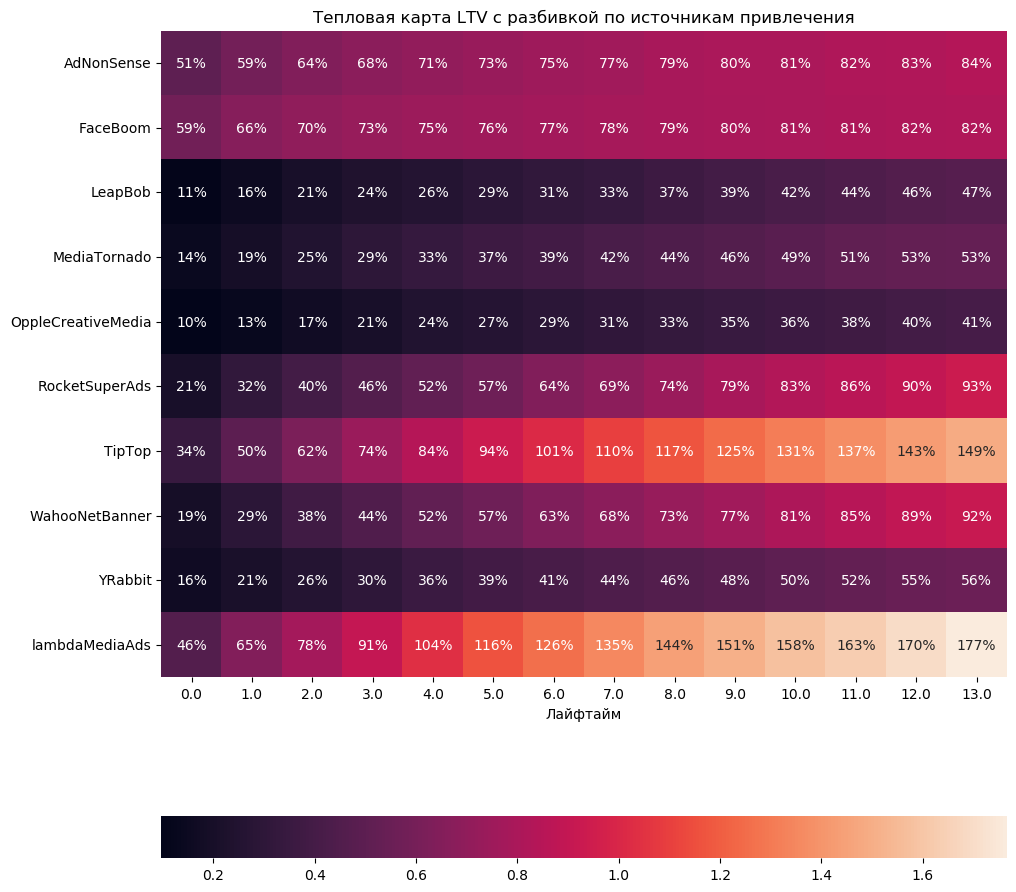

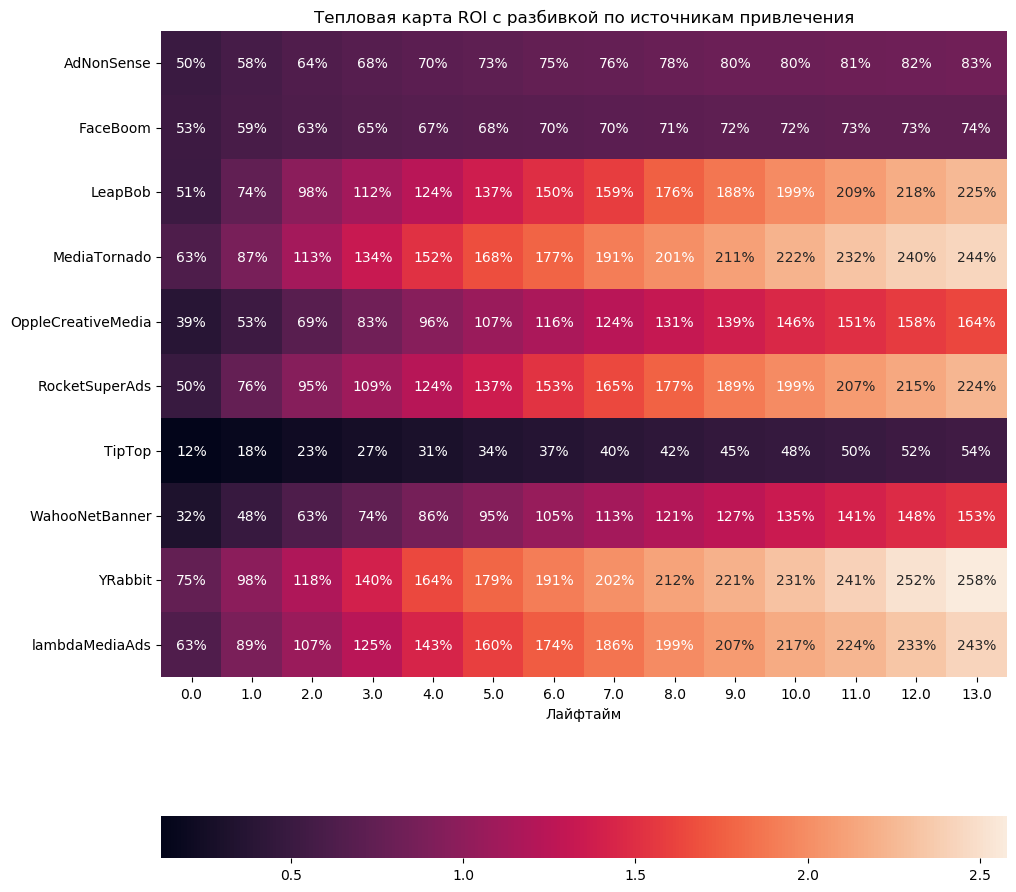

In [41]:
# heatmap LTV
plt.figure(figsize=(24, 12))

sns.heatmap(
    ltv_grouped.drop(columns = ['cohort_size']), 
    annot=True, 
    cbar_kws= {'orientation': 'horizontal'},
    ax=plt.subplot(1, 2, 1),
    fmt='.0%'
           ) 
plt.title('Тепловая карта LTV с разбивкой по источникам привлечения')
plt.xlabel('Лайфтайм')
plt.ylabel('')
plt.show()

# heatmap ROI
plt.figure(figsize=(24, 12))
sns.heatmap(
    roi_grouped.drop(columns = ['cohort_size', 'cac']), 
    annot=True, 
    cbar_kws= {'orientation': 'horizontal'},
    ax=plt.subplot(1, 2, 2),
    fmt='.0%'
           ) 
plt.title('Тепловая карта ROI с разбивкой по источникам привлечения')
plt.xlabel('Лайфтайм')
plt.ylabel('')
plt.show()

- Самый большой показатель LTV у lambdaMediaAds, самый маленький у OppleCreativeMedia
- Реклама не окупилась через такие рекламные каналы, как AdNonSense, FaceBoom, TipTop. Лучше всего реклама окупилась через YRabbit
- Наибольшая стоимость привлечения и динамика роста стоимости у канала TipTop(с 5 дня лайфтайма). Остальные каналы стабильны и ниже в стоимости
- Отличные показатели у канала lambdaMediaAds. На 14-ый день есть большой пик по окупаемости рекламы в июле.

#### Проверьте конверсию пользователей и динамику её изменения. 

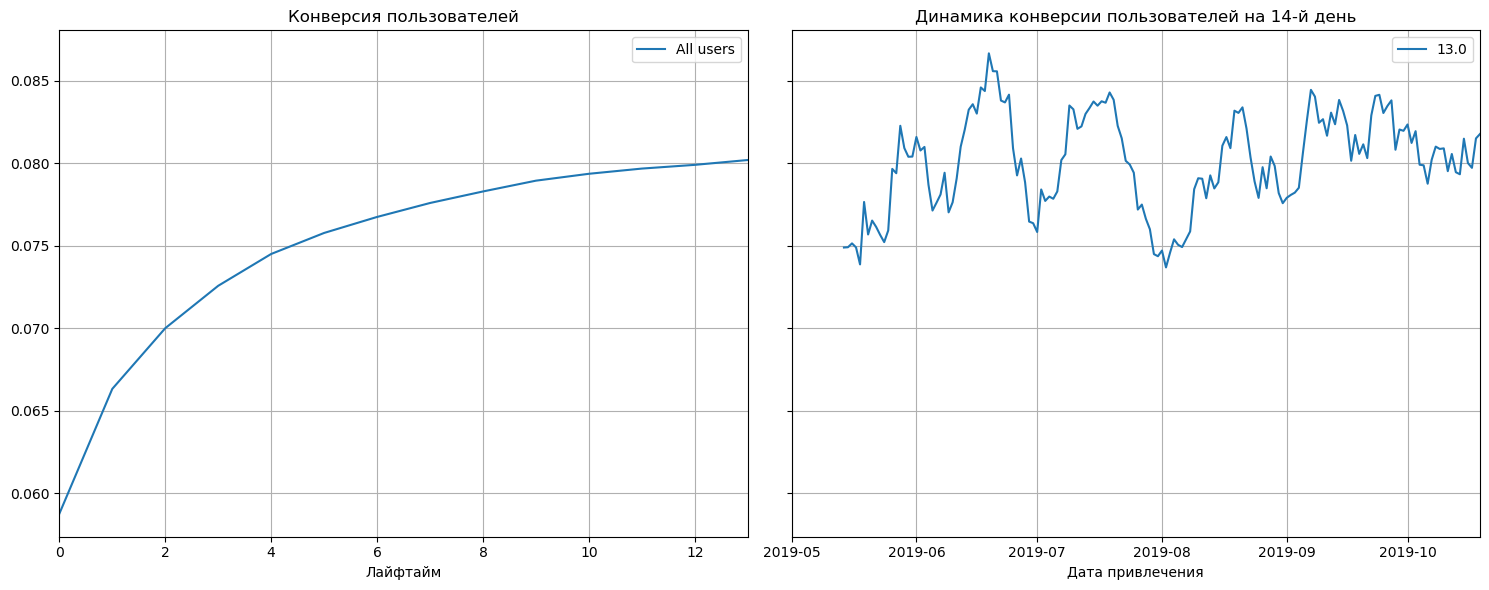

In [42]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

- Конверсия пользователей растет и составляет 6-8 %
- Конверсия 14 дня меняется во времени. Для пользователей, привлечённых в начале августа наблюдается небольшой провал


#####  Конверсия с разбивкой по устройствам

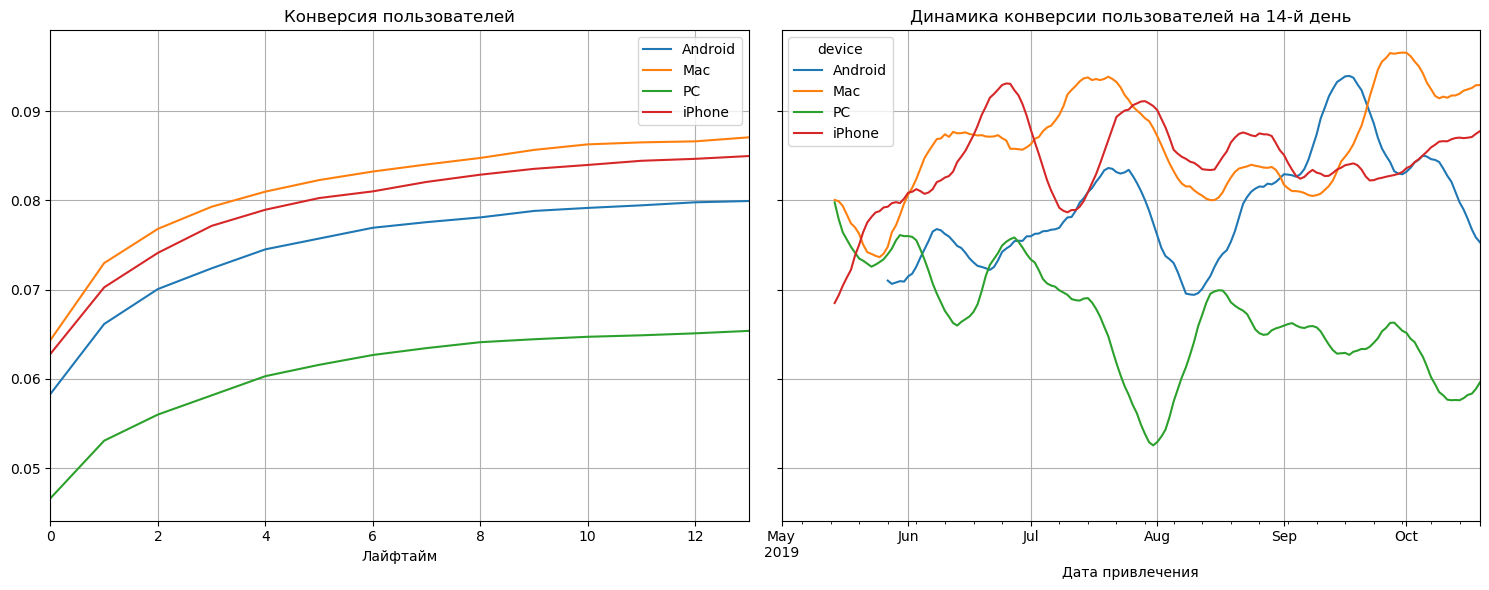

In [43]:
dimensions = ['device']


conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

filter_data(conversion_history, 14)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- Лучше всего конвертируются пользователи Mac и iPhone. Хуже всего пользователи PC
- Конверсия пользователей PC на 14 день с каждым месяцем постепенно убывает, в конце июля виден провал. 
- В сентябре видна хорошая конверсия на 14 день у пользователей Mac и Android

#####  Конверсия с разбивкой по странам

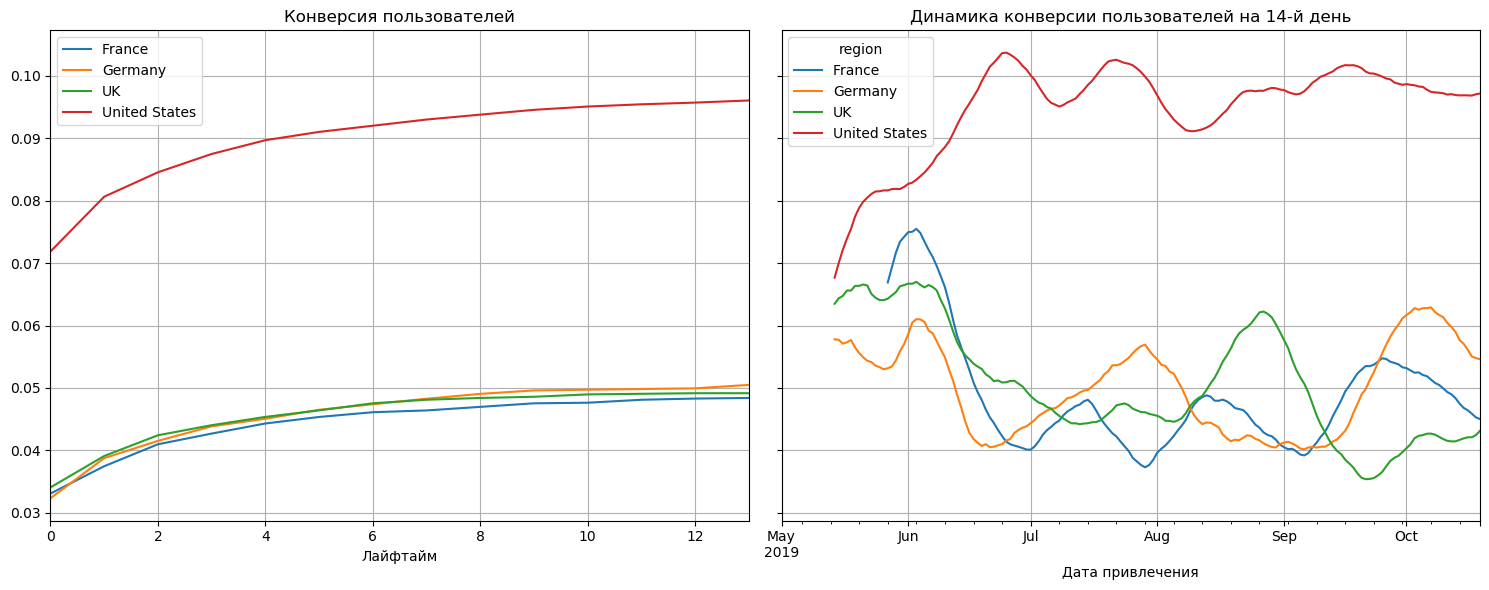

In [44]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

filter_data(conversion_history, 14)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- Конверсия в США намного больше, чем в других странах и составляет ~ 8-10%, в других странах ~3-5%

#####  Конверсия с разбивкой по каналам привлечения

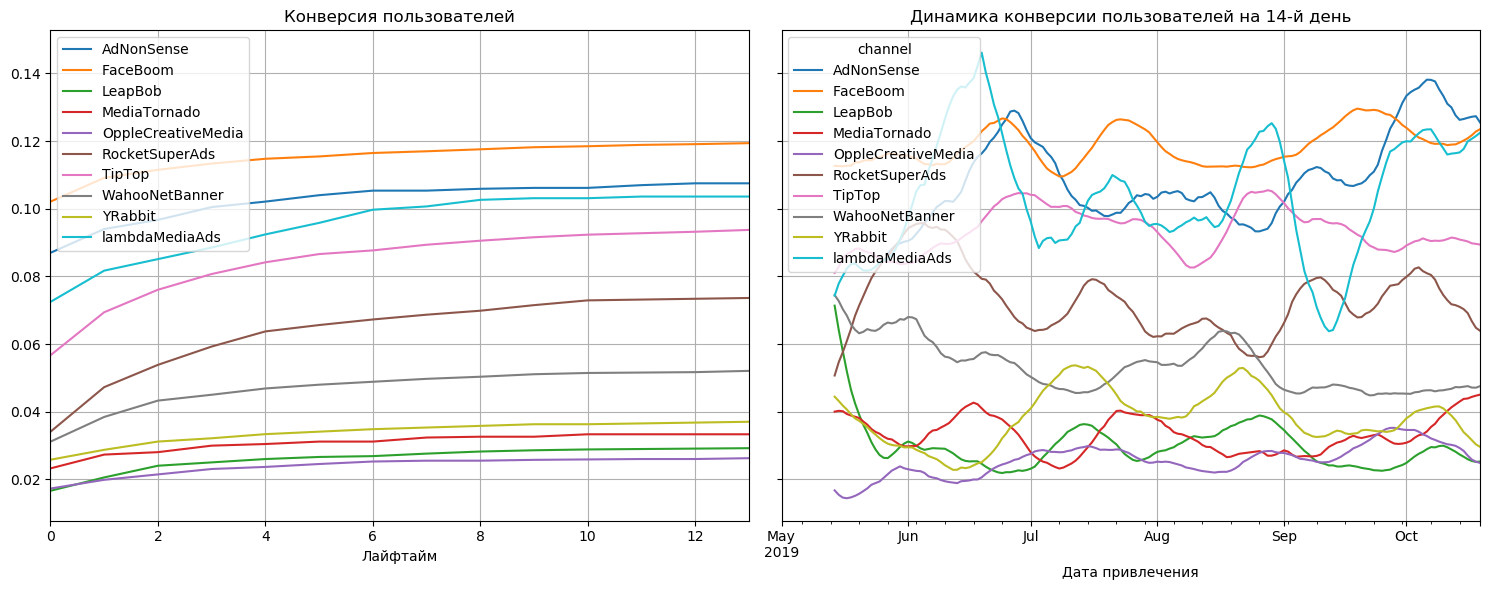

In [45]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

filter_data(conversion_history, 14)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- Выше всего конверсия у канала FaceBoom, ниже всего у OppleCreativeMedia

#### Проверьте удержание пользователей и динамику изменения. 

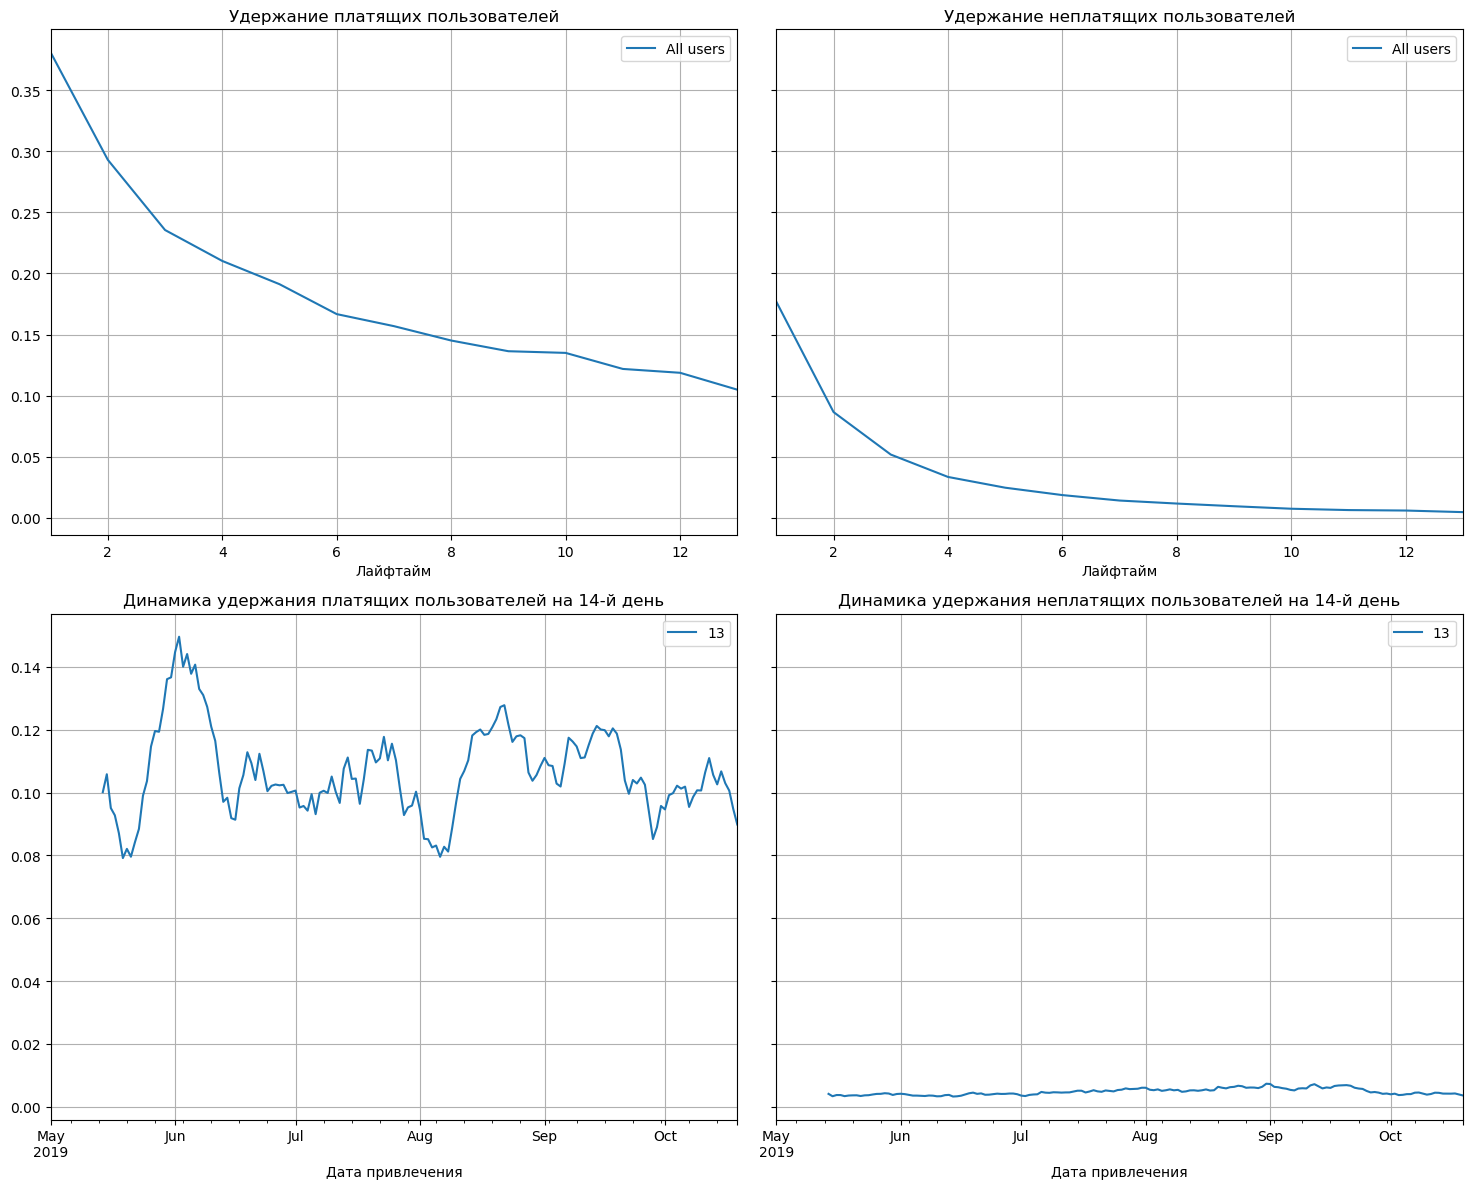

In [46]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

- У платящих пользователей с течением дней удержание падает с 38% до 10%. На 14 день удержание с мая по октябрь держится хорошо
- У неплатящих пользователей с течением дней удержание падает с 18% до 0%. На 14 день удержание во все месяцы близко 0.

#####  Удержание с разбивкой по устройствам

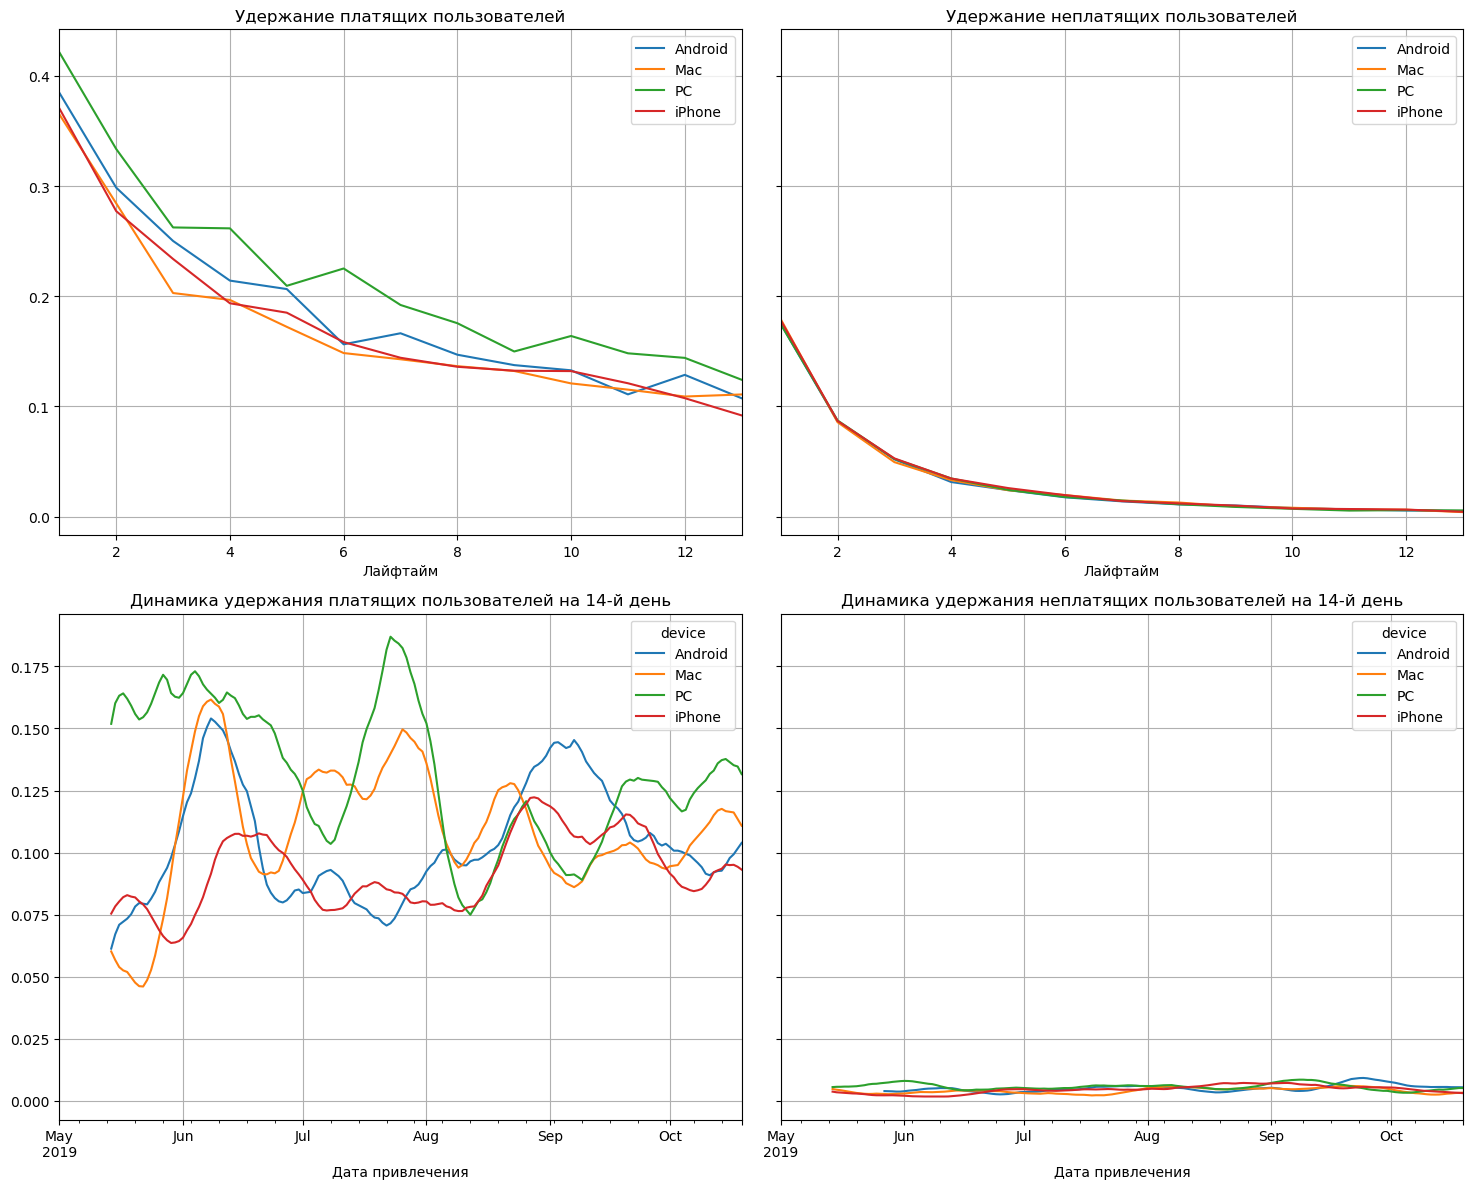

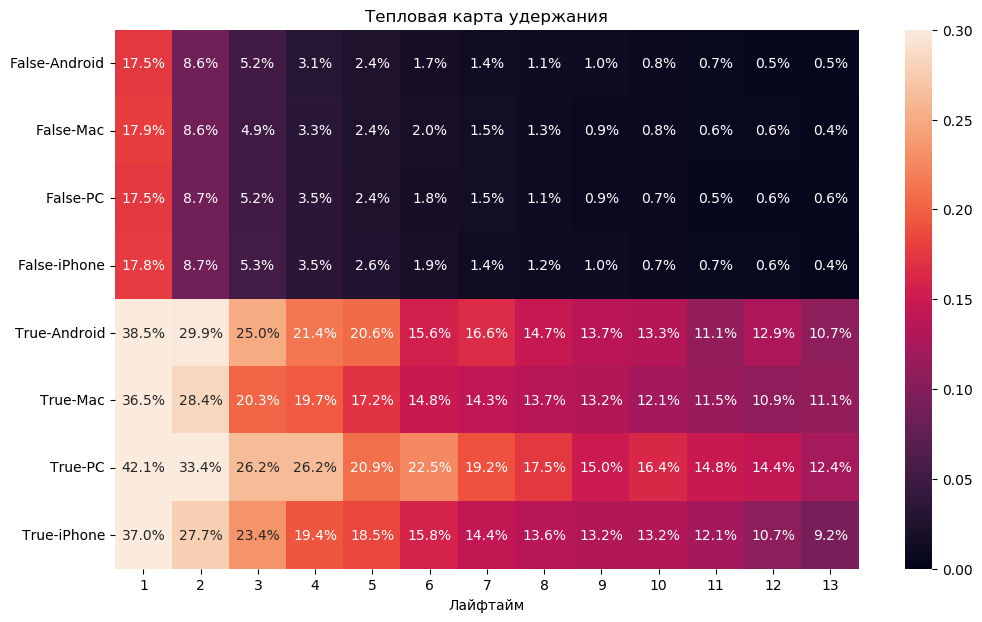

In [47]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

filter_data(retention_history, 14)
plot_retention(retention_grouped, retention_history, horizon_days)

plt.figure(figsize=(12, 7))  
sns.heatmap(
    retention_grouped.drop(columns=['cohort_size', 0]),  
    annot=True,  
    fmt='.1%', 
    vmin=0, 
    vmax=0.3)

plt.title('Тепловая карта удержания')  
plt.xlabel('Лайфтайм')
plt.ylabel('')
plt.show()

- Удержание платящих пользователей лучше всего у пользователей PC. Но и пользователи других устройств практически не отстают.
- Удержание неплатящих пользователей одинаково для пользователей всех устройств и близится к 0
- Удержание платящих пользователей на 14 день для пользователей компьютеров снизилось, а для пользователей телефонов выросло

#####  Удержание с разбивкой по странам

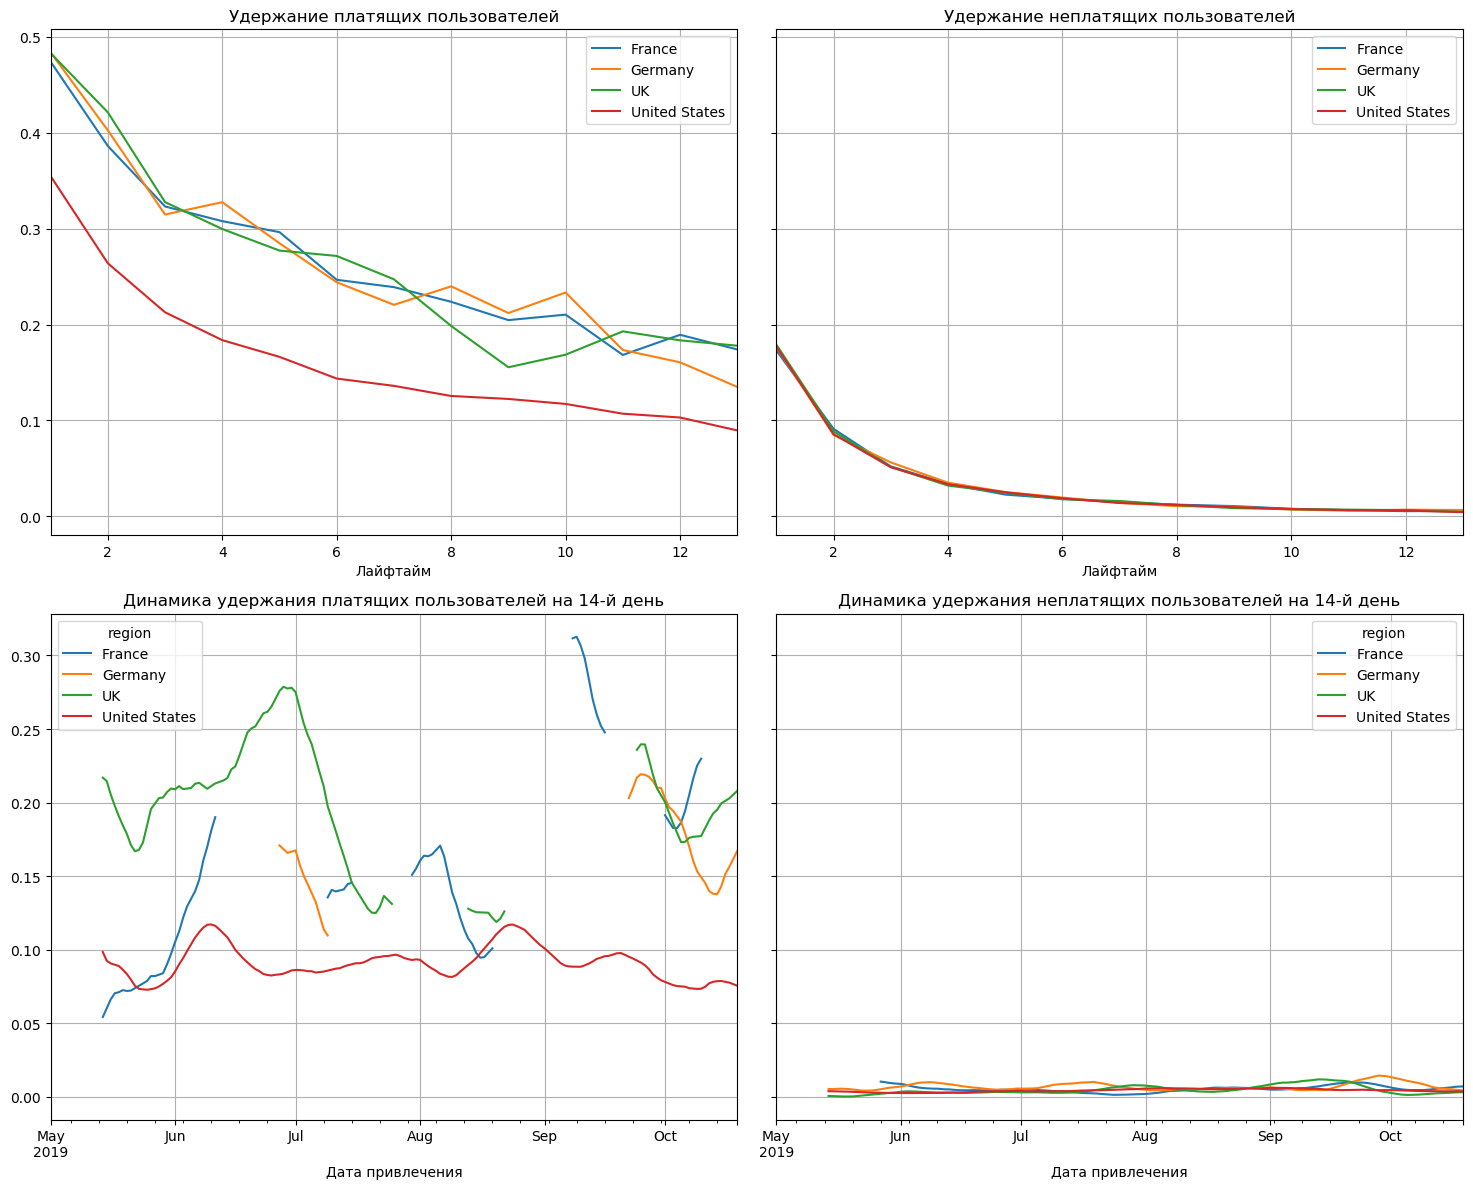

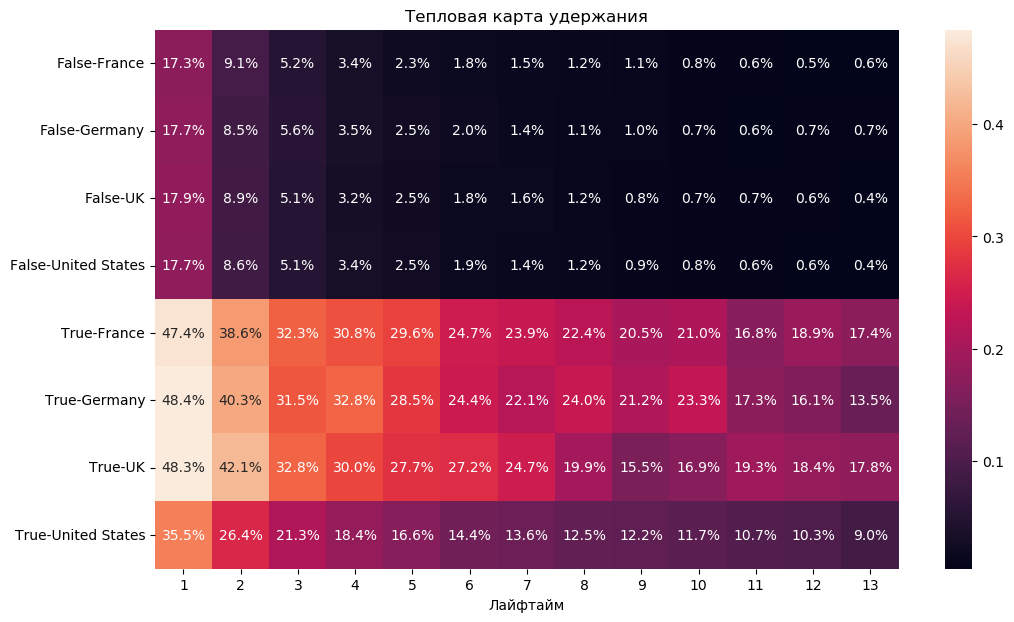

In [48]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

filter_data(retention_history, 14)
plot_retention(retention_grouped, retention_history, horizon_days)

plt.figure(figsize=(12, 7)) 
sns.heatmap(
    retention_grouped.drop(columns=['cohort_size', 0]),  
    annot=True,  
    fmt='.1%')

plt.title('Тепловая карта удержания')  
plt.xlabel('Лайфтайм')
plt.ylabel('')
plt.show()

- Удержание платящих пользователей лучше всего у пользователей из Великобритании, хуже всего у пользователей из США
- Удержание неплатящих пользователей практически одинаково для пользователей из всех стран и близится к 0

#####  Удержание с разбивкой по каналам привлечения 

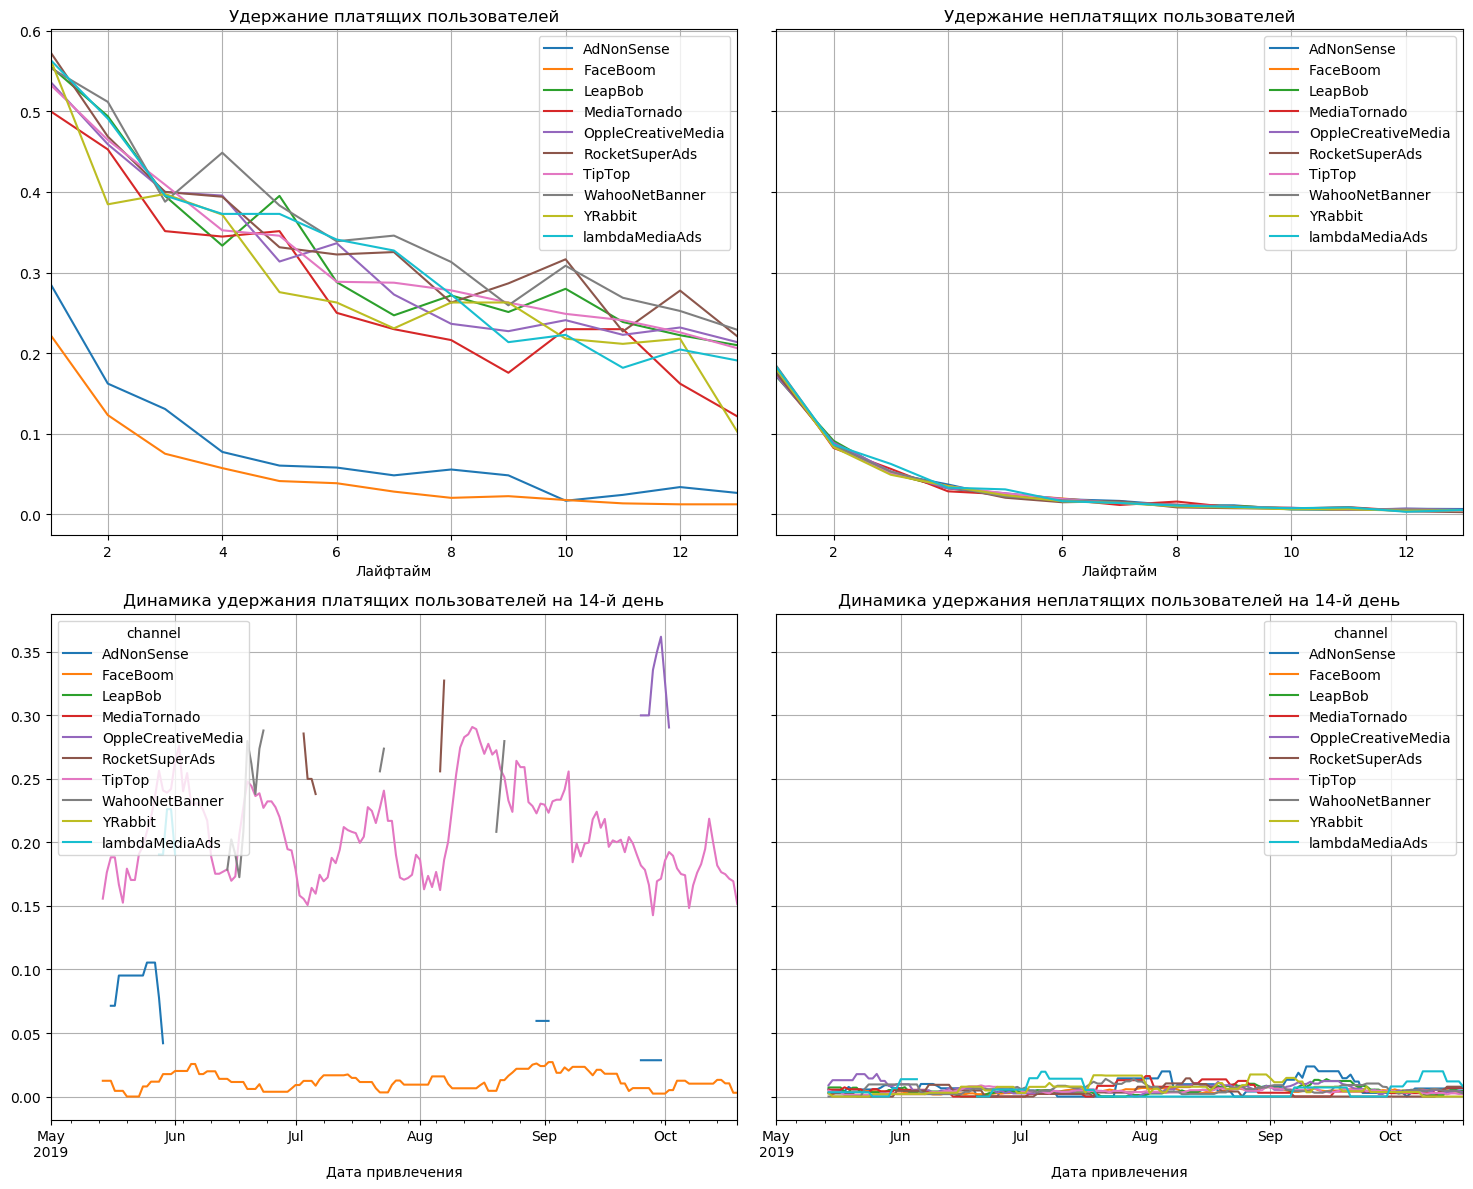

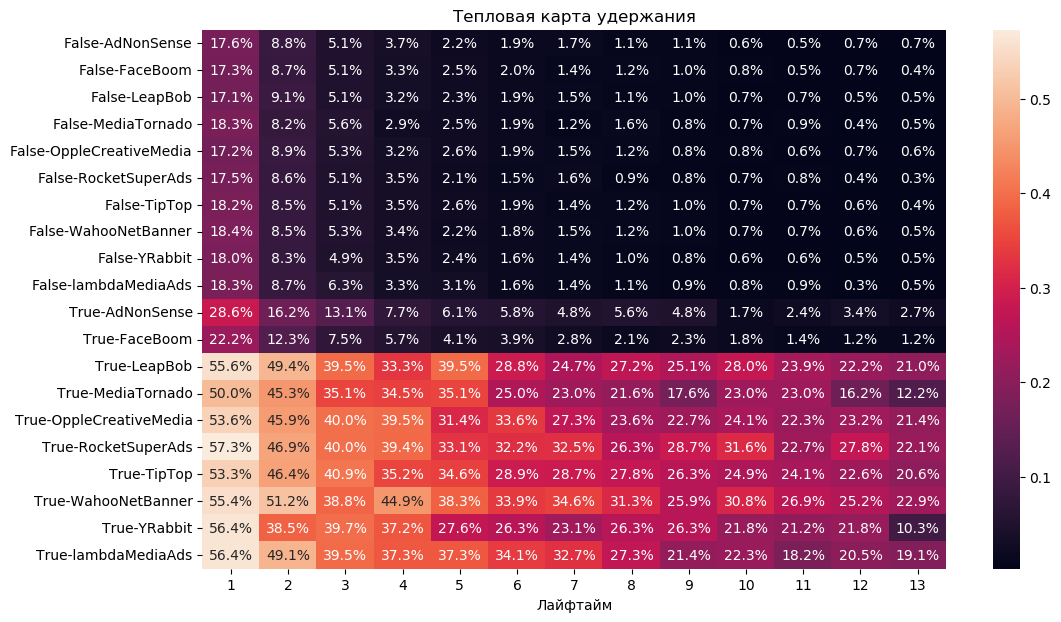

In [49]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

plt.figure(figsize=(12, 7)) 
sns.heatmap(
    retention_grouped.drop(columns=['cohort_size', 0]),  
    fmt='.1%',  
    annot=True)

plt.title('Тепловая карта удержания')  
plt.xlabel('Лайфтайм')
plt.ylabel('')
plt.show()

- Удержание платящих пользователей лучше всего у пользователей прищедших через каналы RocketSuperAds, WahooNetBanner. Очень сильно падают показатели удержания у каналов MediaTornado и YRabbit. Аутсайдеры каналов среди платящих пользователей: AdNonSense, FaceBoom
- Удержание неплатящих пользователей одинаково для всех рекламных каналов и близится к 0

Для того, чтобы сделать выводы по полученным данным, создам таблицу, в которой отображено, сколько пользователей привлекли рекламные каналы в разбивке по странам

In [50]:
profiles.pivot_table(index='channel', columns='region', values='user_id', aggfunc='nunique') \
        .fillna(0) \
        .sort_values(['United States', 'France', 'Germany', 'UK'], ascending=False) \
        .astype(int)

region              France  Germany    UK  United States
channel                                                 
FaceBoom                 0        0     0          29144
TipTop                   0        0     0          19561
RocketSuperAds           0        0     0           4448
MediaTornado             0        0     0           4364
YRabbit                  0        0     0           4312
OppleCreativeMedia    2991     2562  3052              0
LeapBob               2988     2519  3046              0
WahooNetBanner        2971     2579  3003              0
AdNonSense            1366     1219  1295              0
lambdaMediaAds         742      649   758              0

В США и Еврпейских странах работают разные рекламные каналы

**Вывод**

- В целом реклама не окупается. Расходы на рекламу растут, окупаемость падает.
- Из стран хуже всего окупается США. У пользователей из США самое плохое удержание, хотя конвертируются они лучше всех. Канал FaceBoom самый дорогой и с самым плохим удержанием пользователей. Канал TipTop - самые большие затраты  и самая маленькая окупаемость. В Европейских странах канал OppleCreative плохо конвертируется, канал AdNonsense - требует больших вложений, при этом у пользователей плохое удержание. 
- Из всех устройств окупаются только пользователи PC, для пользователей Mac и iPhone тратится больше всего денег на рекламу, при этом конверсия у пользователей PC хуже остальных. 
- Проблемы окупаемости связаны с плохим удержанием пользователей и огромными затратами на рекламы в некоторых каналах. Необходимо пересмотреть рекламный бюджет для некоторых каналов


**Промежуточные рекомендации для отдела маркетинга**

- Необходимо выбрать перспективные рекламные каналы и снизить огромные расходы на рекламу в каналах с плохим удержанием и конверсией. 

### Напишите выводы

В ходе работы были проанализированы данные, предоставленные компанией Procrastinate Pro+ (с 1 мая по 27 октября 2019 года)

В результате исследования было выявлено, что компания терпит убытки по причине огромных трат на рекламные каналы FaceBoom, TipTop в США и AdNonSence и OppleCreative в Европе. Причины неэффективности привлечения пользователей кроются в излишних затратах на рекламу в этих каналах и низким удержанием и конверсией пользователей пришедших из этих каналов. 

**Рекомендации для отдела маркетинга:**

- В первую очередь обратить внимание на пользователей из США, снизить затраты на каналы FaceBoom и TipTop. Обратить внимание на перспективный канал RocketSuperAds, у которого хорошие показатели.
- Для пользователей из Европейских стран снизить затраты на канал AdNonSense и OppleCreative. Обратить внимание на канал lambdaMediaAds